# Project Code

### Data Cleaning and Exploratory Data Analysis

In [1]:
# Clearning and Base Imports 
import time
import pandas as pd
import numpy as np
from math import ceil, sqrt

# Plots
import matplotlib.pyplot as plt
import seaborn as sn 

# Logistic Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Apriori and Association Rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Normalizing and Train Test Split
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error

#Random Forest and Nural Network Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Confusion Matrix And ROC Plot Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\debug\cli\debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants


In [2]:
# read data
df_players = pd.read_csv("2023_LoL_esports_match_data_from_OraclesElixir.csv")

In [3]:
# debug functions
def df_cols_with_nunique_val(df: pd.DataFrame, value: int, name: str = ""):
    """
    Summary: Displays the columns of a dataframe that have a number of unique
             values equal to the specified amount.
    Parameters:
        df: The dataframe to examine.
        value: Display only columns with nunique equal to this.
        name: The name of the dataframe variable.
    """
    # num unique per col
    unique_vals_per_col = list(df.nunique(axis=0))
    # zip col name and corresponding nuniques
    zipped = zip(list(df.columns[range(df.shape[1])]), unique_vals_per_col)
    # filter out nuniques != value
    uniques_per_col = {k:v for (k,v) in zipped if v == value}
    print(f"df={name}, len={len(uniques_per_col)}, cols with nunique of "
          f"{value}={list(uniques_per_col.keys())}")

def df_uniques(df: pd.DataFrame, name: str = "",
               display_uniques: bool = False):
    """
    Summary: Displays the number of uniques for every column in a dataframe and
             optionally the actual unique values.
    Parameters:
        df: The dataframe to examine.
        name: The name of the dataframe variable.
        display_uniques: True to display the actual unique values and number of
                         unique values. False to just show the number of unique
                         values.
    """
    # num unique per col
    unique_vals_per_col = list(df.nunique(axis=0))
    # zip col num and corresponding nuniques, then convert to dictionary
    zipped = zip(range(df.shape[1]), unique_vals_per_col)
    col_nuniques = {k:v for (k,v) in zipped}
    print(f"df={name}")
    zipped = zip(range(df.shape[1]), list(df.columns[range(df.shape[1])]))
    for i, col in zipped:
        # display the stats + unique values?
        if display_uniques:
            print(f"  col={i}=>'{col}', nunique={col_nuniques[i]},"
                  f"uniques={df.iloc[:, i].unique()}")
        # else just the stats
        else:
            print(f"  col={i}=>'{col}', nunique={col_nuniques[i]}")

def df_cols_with_nans(df: pd.DataFrame, name: str = "",
                      show_cols: bool = True):
    """
    Summary: Displays the number of missing values in a dataframe, and
             optionally displays the number of missing values for each column.
    Parameters:
        df: The dataframe to examine.
        name: The name of the dataframe variable.
        show_cols: True to display the total number of missing values and the 
                   number of missing values for each column. False to just
                   display the total number of missing values.
    """
    print(f"df={name}\nTotal Missing Values: {df.isna().sum(axis=1).sum()}")
    # just print the basic value?
    if show_cols is False:
        return
    # show nans by col number/name
    zipped = zip(range(df.shape[1]), list(df.columns[range(df.shape[1])]))
    for i, col in zipped:
        nans = df[col].isna().sum()
        if nans > 0:
            print(f"  col={i}=>'{col}', nans={nans}")

def df_dtypes(df: pd.DataFrame, name: str = ""):
    """
    Summary: Displays just the datatypes for each column in a dataframe.
    Parameters:
        df: The dataframe to examine.
        name: The name of the dataframe variable.
    """
    # show data types by column
    print(f"df={name}\n{df.dtypes.to_string()}")

In [4]:
# debug / data exploration example
# used these functions to examine the dataset to determine what needed cleaning

df_debug = df_players  # change me to df being examined
df_debug_name = "df_players"  # copy the name of the above var for display
df_cols_with_nunique_val(df_debug, 0, df_debug_name)
df_cols_with_nunique_val(df_debug, 1, df_debug_name)
df_cols_with_nans(df_debug, df_debug_name)
df_uniques(df_debug, df_debug_name)
df_dtypes(df_debug, df_debug_name)
print(f"{df_debug_name}: shape={df_debug.shape}")
print(df_debug.info())
print(df_debug.describe())

df=df_players, len=0, cols with nunique of 0=[]
df=df_players, len=1, cols with nunique of 1=['year']
df=df_players
Total Missing Values: 2488564
  col=2=>'url', nans=59760
  col=5=>'split', nans=13128
  col=9=>'patch', nans=120
  col=13=>'playername', nans=12105
  col=14=>'playerid', nans=12375
  col=16=>'teamid', nans=84
  col=17=>'champion', nans=12092
  col=18=>'ban1', nans=7026
  col=19=>'ban2', nans=7002
  col=20=>'ban3', nans=7182
  col=21=>'ban4', nans=7146
  col=22=>'ban5', nans=7308
  col=30=>'doublekills', nans=12792
  col=31=>'triplekills', nans=12792
  col=32=>'quadrakills', nans=12792
  col=33=>'pentakills', nans=12792
  col=34=>'firstblood', nans=10660
  col=35=>'firstbloodkill', nans=12092
  col=36=>'firstbloodassist', nans=22752
  col=37=>'firstbloodvictim', nans=22752
  col=40=>'firstdragon', nans=62592
  col=41=>'dragons', nans=60460
  col=42=>'opp_dragons', nans=60460
  col=43=>'elementaldrakes', nans=62592
  col=44=>'opp_elementaldrakes', nans=62592
  col=45=>'infe

In [5]:
# clean data

# url is not a relevant column, year is unary
df_players.drop(["url", "year"], inplace=True, axis=1)

# create a dataframe for just the teams
df_teams = df_players[df_players["position"] == "team"].copy()
# remove teams from the players dataframe
df_players = df_players[df_players["position"] != "team"].copy()

# remove unused columns from players DF:
df_players.drop(["gspd", "firstdragon", "dragons", "opp_dragons",
                 "elementaldrakes", "opp_elementaldrakes", "infernals",
                 "mountains", "clouds", "oceans", "chemtechs", "hextechs",
                 "dragons (type unknown)", "elders", "opp_elders",
                 "firstherald", "heralds", "opp_heralds", "firstbaron",
                 "firsttower", "towers", "opp_towers", "firstmidtower",
                 "firsttothreetowers", "turretplates", "opp_turretplates",
                 "split", "patch", "ban1", "ban2", "ban3", "ban4", "ban5",
                 "teamid"],
                inplace=True, axis=1)

# seperate games with partial data and complete data into two dataframes
# the data is still useful for some questions, but not for all questions
col = "datacompleteness"  # here just to make next 2 lines shorter
df_players_partial = df_players[df_players[col] == "partial"].copy()
df_players_complete = df_players[df_players[col] != "partial"].copy()

# remove unused df_players_partial cols
drop = ["doublekills", "triplekills", "quadrakills", "pentakills",
        "firstblood", "firstbloodassist", "firstbloodvictim", "barons",
        "opp_barons", "inhibitors", "opp_inhibitors",
        "damagemitigatedperminute", "goldat10", "xpat10", "csat10",
        "opp_goldat10", "opp_xpat10", "opp_csat10", "golddiffat10",
        "xpdiffat10", "csdiffat10", "killsat10", "assistsat10", "deathsat10",
        "opp_killsat10", "opp_assistsat10", "opp_deathsat10", "goldat15",
        "xpat15", "csat15", "opp_goldat15", "opp_xpat15", "opp_csat15",
        "golddiffat15", "xpdiffat15", "csdiffat15", "killsat15",
        "assistsat15", "deathsat15", "opp_killsat15", "opp_assistsat15",
        "opp_deathsat15", "datacompleteness"]
df_players_partial.drop(drop, inplace=True, axis=1)

# remove unused df_players_complete cols
drop = ["monsterkillsownjungle", "monsterkillsenemyjungle", "datacompleteness"]
df_players_complete.drop(drop, inplace=True, axis=1)

# remove null playid
na_mask = df_players_complete["playerid"].isna() != True
df_players_complete = df_players_complete[na_mask]

# we're going to need this computed column later on
df_players_complete["kills+assists"] = df_players_complete["kills"] + \
                                       df_players_complete["assists"]

# remove unused df_teams cols
# these are all player stats or columns we've previousy decided to remove in
# other dataframes
# dragons (type unknown), monsterkillsownjungle, monsterkillsenemyjungle
drop = ["playername", "playerid", "champion", "firstbloodkill",
        "firstbloodassist", "firstbloodvictim", "damageshare",
        "earnedgoldshare", "total cs", "position", "split", "patch",
        "datacompleteness", "dragons (type unknown)", "monsterkillsownjungle",
        "monsterkillsenemyjungle"]
df_teams.drop(drop, inplace=True, axis=1)

# these leagues are problematic in the amount of missing data associated with
# them
league_mask = df_teams["league"].isin(["LDL", "LPL"])
df_teams = df_teams[~league_mask]

# replace unknown values in ban columns with a single value ("-")
ban_cols = ["ban1", "ban2", "ban3", "ban4", "ban5"]
for col in ban_cols:
    df_teams[col] = df_teams[col].fillna("-")

# detecting duplicate bans
bancols = ["ban1", "ban2", "ban3", "ban4", "ban5"]
# default value
df_teams["badban"] = False
# compare ban1 to ban2+3+4+5, ban2 to ban3+4+5, ban3 to ban4+5, ban4 to ban5
for i in range(len(bancols)):
    for j in range(i + 1, len(bancols)):
        # if both values are the same, and the value is not "-", set to True
        # otherwise use the present value
        conditions = ((df_teams[bancols[i]] != "-") &
                      (df_teams[bancols[i]] == df_teams[bancols[j]]))
        df_teams["badban"] = np.where(conditions, True, df_teams["badban"])
# get teams with a bad ban
badban_mask = df_teams["badban"] == True
df_p4 = df_teams[badban_mask]
# drop the games played by teams with bad bans
badban_mask = df_teams["gameid"].isin(df_p4["gameid"].unique())
df_teams = df_teams[~badban_mask]
# no longer need badbans
df_teams.drop(["badban"], inplace=True, axis=1)

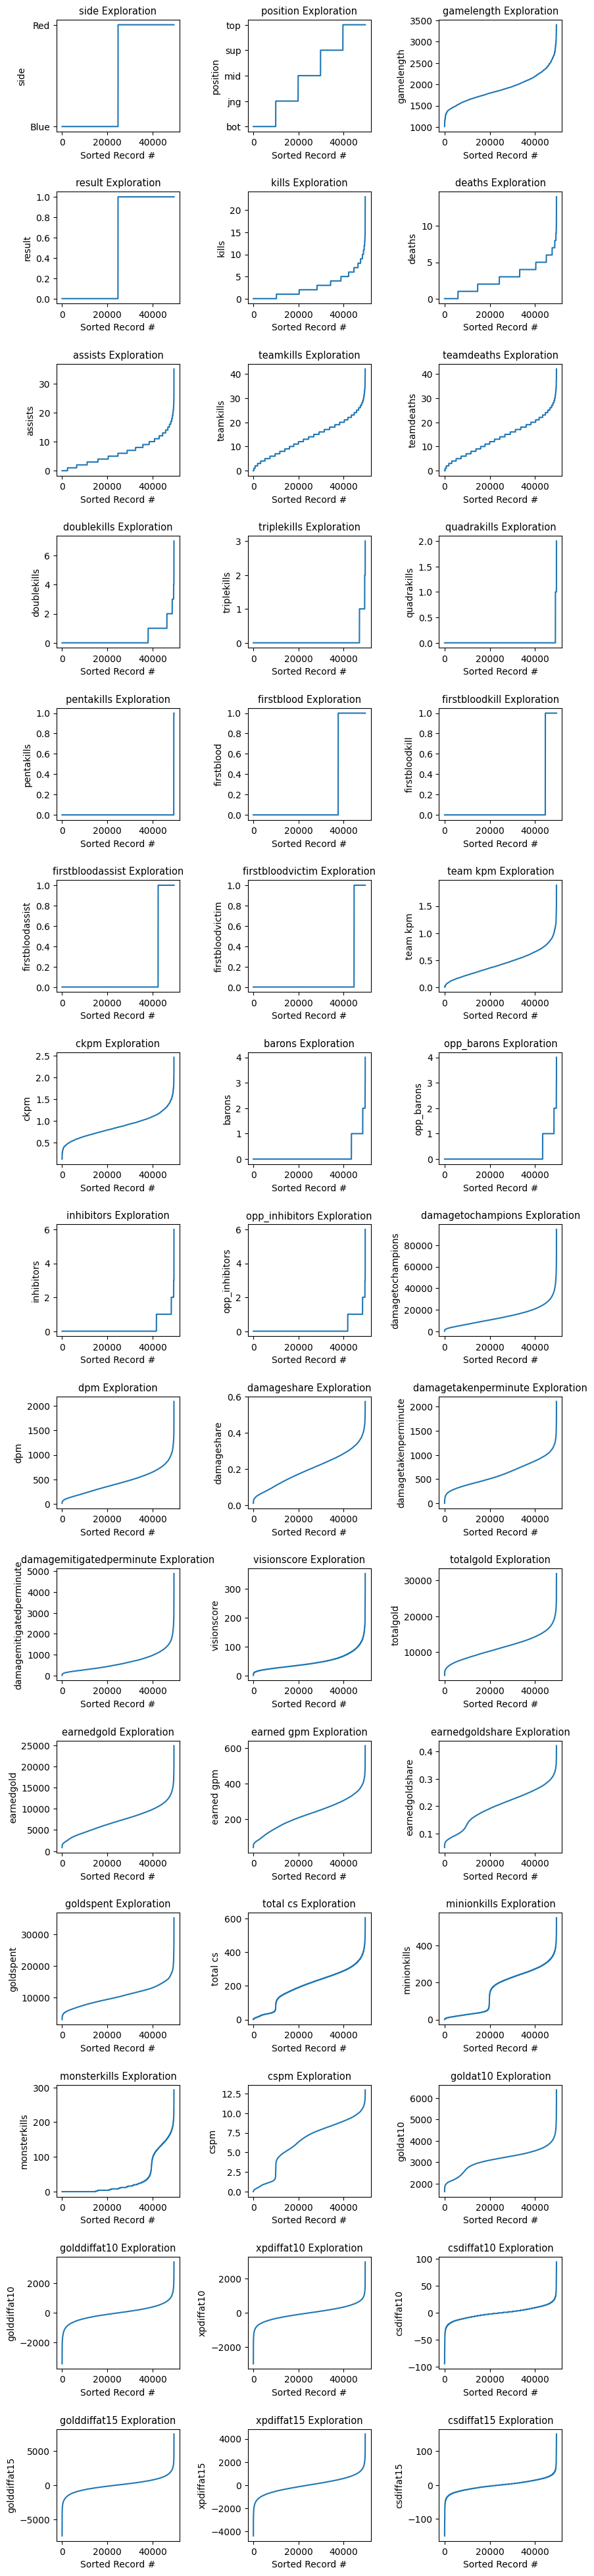

In [6]:
def plot_columns(df: pd.DataFrame, cols = None, num_cols = None):
    """
    Summary: Displays a giant graph of the columns in a dataframe. Each column
             gets its own subplot which displays its sorted values.
    Parameters:
        df: The dataframe to graph.
        cols: Optionally a list of column names to display. If None, displays
              every column.
        num_cols: The number of columns to display in the giant graph.
    """

    # plot only specified cols, everything if nothing is specified
    if cols is None:
        df_masked = df
    else:
        df_masked = df[cols]

    # plot all this data to see if its continuous, integer counts or
    # categorical
    num_plots = len(cols)

    if num_cols is None:
        # square shape
        nrows = ncols = ceil(sqrt(num_plots))
    else:
        # calc number of rows based on number of features and number of display
        # cols
        ncols = num_cols
        if num_plots % num_cols == 0:
            nrows = num_plots // num_cols
        else:
            nrows = num_plots // num_cols + 1
    
    # make a graph with multiple plots.
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_size_inches(ncols * 3, nrows * 2.5 + 2)
    if num_plots <= 30:
        # this creates tons of whitespace when num_plots gets really large
        # 30 is an arbitrary number
        fig.suptitle("Plotting sorted data points for each specified feature")
    for i, col in zip(range(num_plots), cols):
        ax[i // ncols, i % ncols].plot(sorted(df_masked[col]))
        ax[i // ncols, i % ncols].set_title(f"{col} Exploration",
                                            fontsize=10.5)
        # ax[i // ncols, i % ncols].ylabel(col)
        ax[i // ncols, i % ncols].set_ylabel(col)
        ax[i // ncols, i % ncols].set_xlabel("Sorted Record #")
    plt.tight_layout(pad=2)
    plt.show()

# small plot to test
# feature_list = ['gamelength', 'result', 'firstbloodkill', 'firstbloodassist',
#                 'firstbloodvictim', 'firstbloodvictim', 'team kpm', 'barons',
#                 'opp_barons', 'inhibitors', 'dpm', 'damagetakenperminute',
#                 'visionscore', 'earned gpm', 'cspm', 'golddiffat10',
#                 'position_bot', 'position_jng', 'position_mid', 'position_sup',
#                 'position_top']
# drop_cols = [col for col in df_players_complete if col not in feature_list]
# df_temp = df_players_complete.drop(columns=drop_cols)
# plot_columns(df_temp, list(df_temp.columns),  num_cols=3)

# dhoom plot
df_temp = df_players_complete.drop(["champion", "playerid", "playername",
                                    "teamname", "gameid", "playoffs", "date",
                                    "league", "game", "participantid",
                                    "kills+assists", "wardsplaced", "wpm",
                                    "wardskilled", "wcpm",
                                    "controlwardsbought", "vspm", "xpat10",
                                    "csat10", "opp_goldat10", "opp_xpat10",
                                    "opp_csat10", "killsat10", "assistsat10",
                                    "deathsat10", "opp_killsat10",
                                    "opp_assistsat10", "goldat15",
                                    "xpat15", "csat15", "opp_goldat15",
                                    "opp_xpat15", "opp_csat15", "killsat15",
                                    "assistsat15", "deathsat15",
                                    "opp_killsat15", "opp_assistsat15",
                                    "opp_deathsat15", "opp_deathsat10"],
                                    axis=1)
plot_columns(df_temp, list(df_temp.columns), num_cols=3)

In [7]:
def plot_avg_col_per_side(col_name: str, col_display: str):
    df_eda = df_teams[[col_name, "side"]]
    # print(df_eda)
    df_eda = df_eda.groupby('side').mean()
    # print(df_eda)
    df_eda = df_eda.transpose()
    # print(df_eda)
    sn.barplot(df_eda, palette=["blue", "red"])
    plt.xlabel("Side")
    plt.ylabel(col_display)
    plt.title(f"Mean {col_display} by Side")
    plt.show()

def plot_wins_per_side():
    df_eda = df_teams[["result", "side"]]
    df_eda = df_eda[df_eda["result"] == 1]
    df_eda = df_eda.groupby('side').count()
    df_eda = df_eda.transpose()
    sn.barplot(df_eda, palette=["blue", "red"])
    plt.xlabel("Side")
    plt.ylabel("Wins")
    plt.title("Wins by Side")
    plt.show()

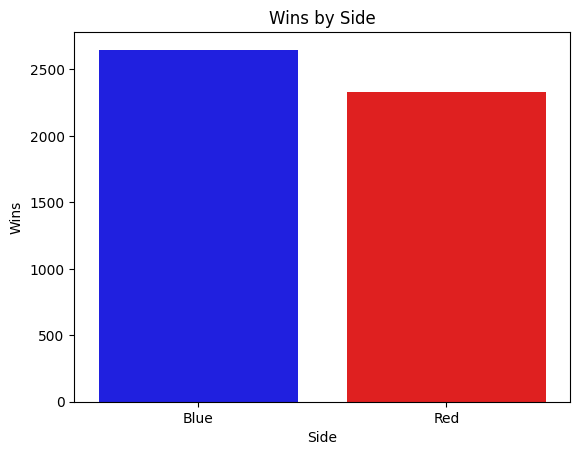

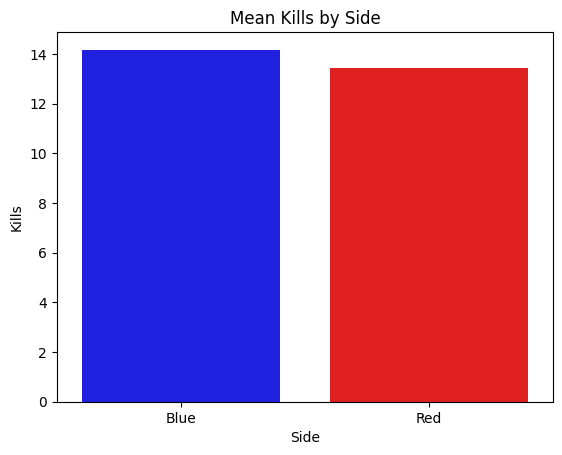

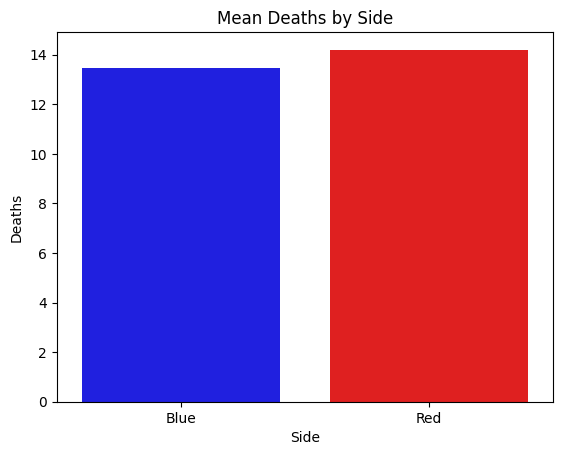

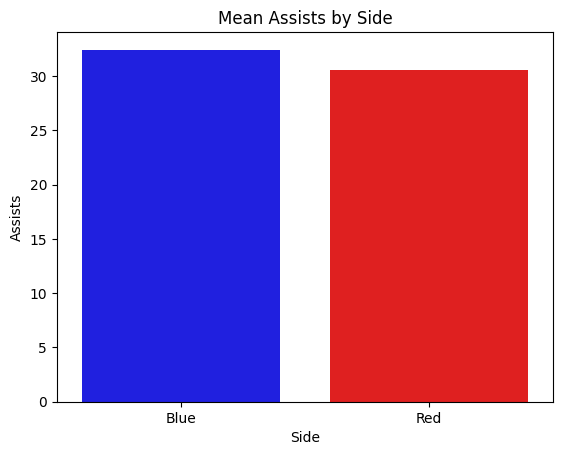

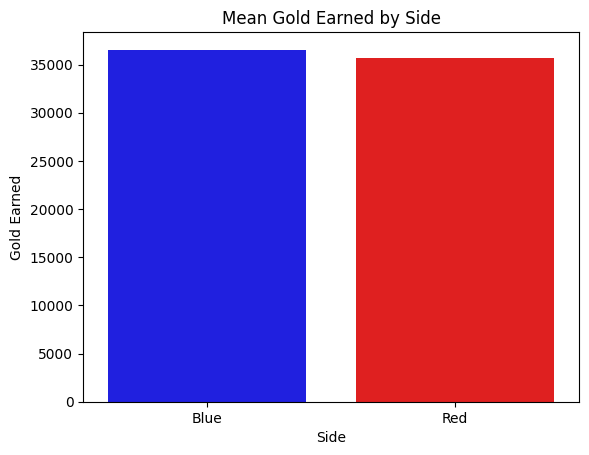

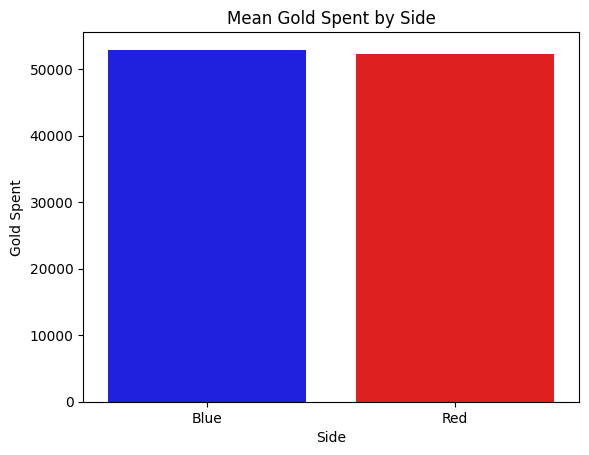

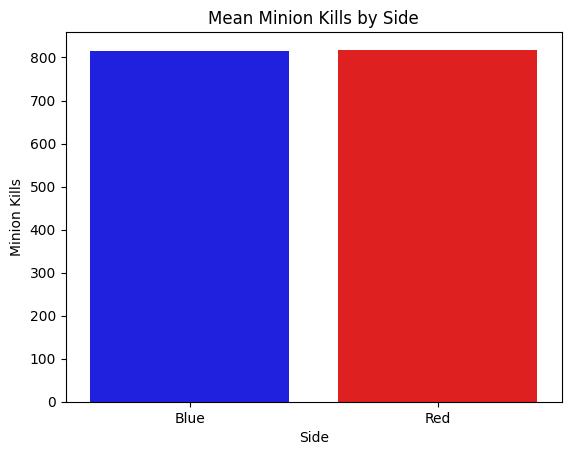

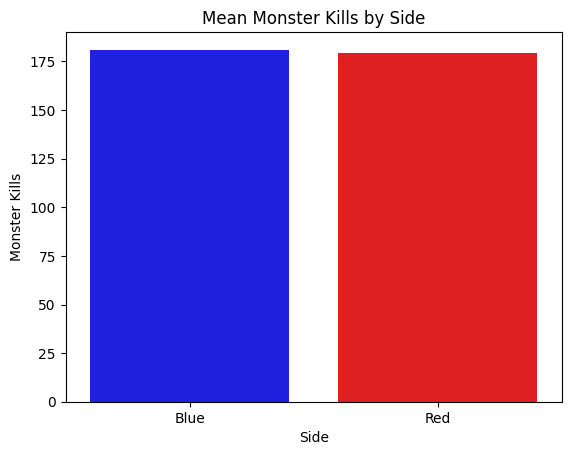

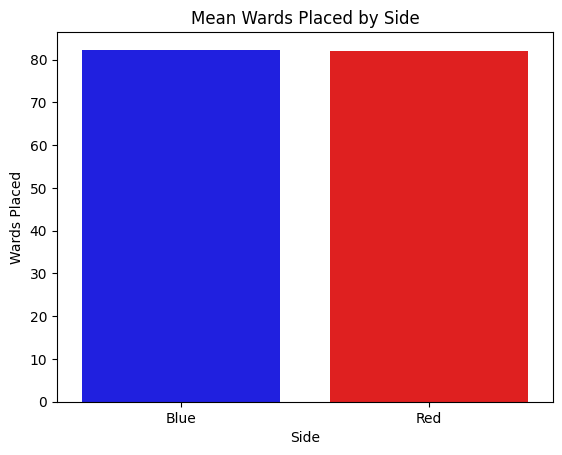

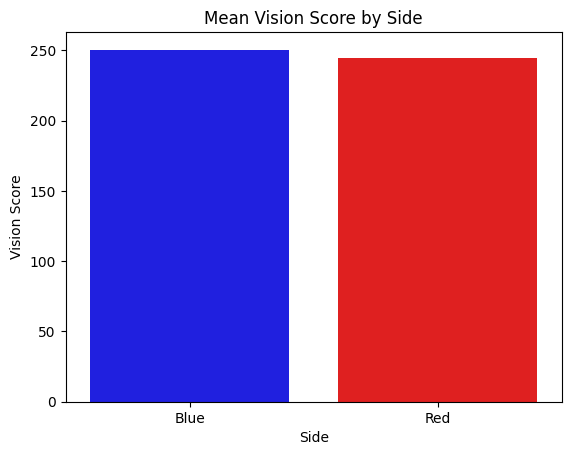

In [8]:
# win distribution makes sense?
plot_wins_per_side()
# do the average values make sense?
plot_avg_col_per_side("kills", "Kills")
plot_avg_col_per_side("deaths", "Deaths")
plot_avg_col_per_side("assists", "Assists")
plot_avg_col_per_side("earnedgold", "Gold Earned")
plot_avg_col_per_side("goldspent", "Gold Spent")
plot_avg_col_per_side("minionkills", "Minion Kills")
plot_avg_col_per_side("monsterkills", "Monster Kills")
plot_avg_col_per_side("wardsplaced", "Wards Placed")
plot_avg_col_per_side("visionscore", "Vision Score")

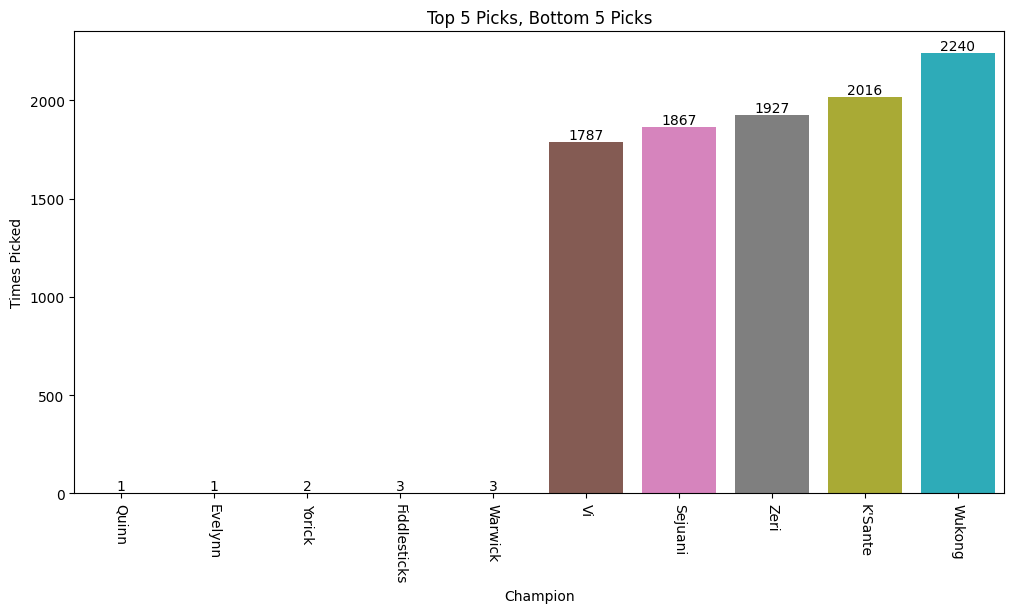

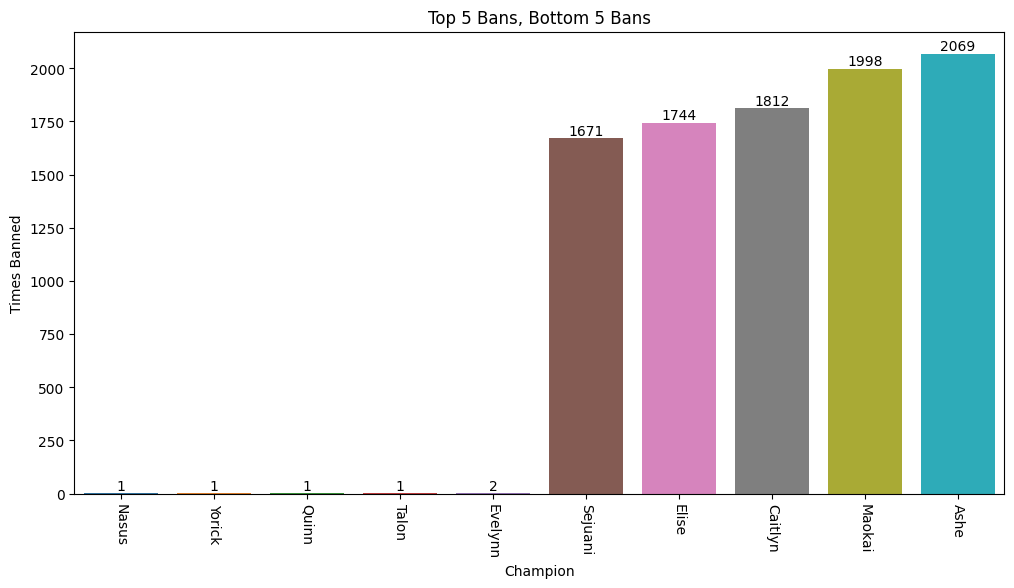

In [9]:
# top 5 and bottom 5 picked champions
df_eda_picked_champs = pd.concat((df_players_complete, df_players_partial))
df_eda_picked_champs = df_eda_picked_champs.groupby("champion").size()
df_eda_picked_champs.sort_values(inplace=True)
df_eda_top5_bot5_picked = pd.concat((df_eda_picked_champs[0:5],
                                     df_eda_picked_champs[-5:]))
df_eda_top5_bot5_picked = pd.DataFrame(df_eda_top5_bot5_picked)

fig, ax = plt.subplots(figsize=(12, 6))
sn.barplot(df_eda_top5_bot5_picked, y=0, x=df_eda_top5_bot5_picked.index)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
plt.xlabel("Champion")
plt.ylabel("Times Picked")
plt.title("Top 5 Picks, Bottom 5 Picks")
plt.show()

# top 5 and bottom 5 banned champions
eda_ban_cols = ["ban1", "ban2", "ban3", "ban4", "ban5"]
df_eda_banned_champs = df_teams[eda_ban_cols].dropna()
df_eda_banned_champs = pd.DataFrame(df_eda_banned_champs.stack())
df_eda_banned_champs = df_eda_banned_champs.groupby(0).size()
df_eda_banned_champs.sort_values(inplace=True)
df_eda_top5_bot5_banned = pd.concat((df_eda_banned_champs[0:5],
                                     df_eda_banned_champs[-5:]))
df_eda_top5_bot5_banned = pd.DataFrame(df_eda_top5_bot5_banned)

fig, ax = plt.subplots(figsize=(12, 6))
sn.barplot(df_eda_top5_bot5_banned, y=0, x=df_eda_top5_bot5_banned.index)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
plt.xlabel("Champion")
plt.ylabel("Times Banned")
plt.title("Top 5 Bans, Bottom 5 Bans")
plt.show()

## Problem-1

Looking for associations between champions played (example: What champions are often picked together what champions are usually not picked together etc.)

#### Data Processing

In [10]:
# get only necessary columns
df_p4 = pd.concat(objs=[df_players_complete[["gameid", "champion", "side"]],
                          df_players_partial[["gameid", "champion"]]],
                          ignore_index=True)
# prepare for one hot encoding by grouping champions by game+team
df_p4 = df_p4.groupby(["gameid", "side"])["champion"].agg(','.join)
# convert the series back into a dataframe
df_p4 = pd.DataFrame(df_p4)
# turn the comma seperated string of champions into a list
df_p4["champion"] = list(df_p4["champion"].str.split(','))
# one hot encode the data points
te = TransactionEncoder().fit(df_p4["champion"])
tdataset = te.transform(df_p4["champion"])
df_p4 = pd.DataFrame(tdataset, columns=te.columns_)

#### Apriori

In [11]:
# apriori setup
def apriori_results_calc(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Summary: Displays the datatypes for each column in a dataframe.
    Parameters:
        df: The dataframe to examine.
        threshold: The min support parameter for the apriori function
    Returns: pandas DataFrame of frequent itemsets with columns
             ['support', 'itemsets']
    """
    frequent_itemsets = apriori(df, min_support=threshold, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift",
                              min_threshold=1)
    return rules

#### Threshold <0.05>

In [12]:
ap_res_0 = apriori_results_calc(df_p4, 0.05)
sorted_0 = ap_res_0.sort_values(by=["confidence", "lift"],
                                ascending=[False,False])
sorted_0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Nami),(Lucian),0.093273,0.096888,0.087952,0.942949,9.732410,0.078915,15.830028,0.989549
0,(Lucian),(Nami),0.096888,0.093273,0.087952,0.907772,9.732410,0.078915,9.831365,0.993509
2,(Lulu),(Zeri),0.109137,0.154518,0.065562,0.600736,3.887804,0.048699,2.117601,0.833781
5,(Rakan),(Xayah),0.118474,0.120482,0.052510,0.443220,3.678729,0.038236,1.579652,0.826030
4,(Xayah),(Rakan),0.120482,0.118474,0.052510,0.435833,3.678729,0.038236,1.562528,0.827916
3,(Zeri),(Lulu),0.154518,0.109137,0.065562,0.424301,3.887804,0.048699,1.547448,0.878535


We initially sorted by support. Support is a metric that tells us how frequently an observation or pairing was observed. Hence we first tried to get values with high support. This yielded the 3 bidirectional pairings made by apriori meaning these champion pairings appeared most frequently among all the games. Where Nami-Lucian is higher than Lulu-Zeri followed by Rakan Xayah. 

#### Threshold <0.025>

In [13]:
ap_res_1 = apriori_results_calc(df_p4,0.025)
sorted_1 = ap_res_1.sort_values(by=["confidence", "lift"],
                                ascending=[False,False])
sorted_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(Nami),(Lucian),0.093273,0.096888,0.087952,0.942949,9.732410,0.078915,15.830028,0.989549
6,(Lucian),(Nami),0.096888,0.093273,0.087952,0.907772,9.732410,0.078915,9.831365,0.993509
8,(Lulu),(Zeri),0.109137,0.154518,0.065562,0.600736,3.887804,0.048699,2.117601,0.833781
0,(Thresh),(Aphelios),0.050904,0.108936,0.025703,0.504931,4.635127,0.020158,1.799879,0.826319
15,(Rakan),(Xayah),0.118474,0.120482,0.052510,0.443220,3.678729,0.038236,1.579652,0.826030
14,(Xayah),(Rakan),0.120482,0.118474,0.052510,0.435833,3.678729,0.038236,1.562528,0.827916
9,(Zeri),(Lulu),0.154518,0.109137,0.065562,0.424301,3.887804,0.048699,1.547448,0.878535
3,(Jayce),(Maokai),0.095281,0.119277,0.025904,0.271865,2.279273,0.014539,1.209560,0.620374
1,(Aphelios),(Thresh),0.108936,0.050904,0.025703,0.235945,4.635127,0.020158,1.242183,0.880134
13,(Rakan),(Wukong),0.118474,0.180622,0.026908,0.227119,1.257422,0.005509,1.060159,0.232236


Lowering our support to include results with lower support values we can now rely on other metrics to help us look for interactions. Confidence is a metric or a measure of the reliability of the rule. Meaning how much probability-wise was A explained by C in other words when Nami -> was explained by Lucian. and lift explains the strength of co-relation. So sorting by those metrics and lowering the support threshold to include even more sets of observations we can observe values that may not have high support but have good confidence and lift. We can note that along with our previously observed sets we have new interactions such as (Thresh, Aphelious), (Rakhan, Wukong) and  (Jayce, Makoai)

#### Threshold <0.01>

In [14]:
ap_res_2 = apriori_results_calc(df_p4,0.01)
sorted_2 = ap_res_2.sort_values(by=["confidence", "lift"],
                                ascending=[False,False])
sorted_2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
258,"(Gnar, Nami)",(Lucian),0.012550,0.096888,0.012048,0.960000,9.908394,0.010832,22.577811,0.910502
252,"(Azir, Nami)",(Lucian),0.011345,0.096888,0.010843,0.955752,9.864551,0.009744,20.410341,0.908939
250,"(Lucian, Azir)",(Nami),0.011446,0.093273,0.010843,0.947368,10.156932,0.009776,17.227811,0.911983
281,"(Sejuani, Nami)",(Lucian),0.014659,0.096888,0.013855,0.945205,9.755696,0.012435,16.481802,0.910848
274,"(Maokai, Lucian)",(Nami),0.012450,0.093273,0.011747,0.943548,10.115976,0.010586,16.062020,0.912507
163,(Nami),(Lucian),0.093273,0.096888,0.087952,0.942949,9.732410,0.078915,15.830028,0.989549
286,"(Vi, Nami)",(Lucian),0.017269,0.096888,0.016265,0.941860,9.721171,0.014592,15.533534,0.912897
275,"(Maokai, Nami)",(Lucian),0.012550,0.096888,0.011747,0.936000,9.660684,0.010531,14.111132,0.907882
291,"(Wukong, Nami)",(Lucian),0.016867,0.096888,0.015763,0.934524,9.645448,0.014129,13.792990,0.911702
280,"(Lucian, Sejuani)",(Nami),0.014859,0.093273,0.013855,0.932432,9.996800,0.012469,13.419558,0.913543


Satisfied with observing some of the more common sets. We decided to look for hidden or unique interactions. To do this we lowered our support threshold even more and once again sorted our results by confidence and lift. We can now observe, sets that have more than one value per set such as (Nami, Gnar) -> (Lucian). Interestingly by using these interactions, we can observe various other champions that pair well with Nami and Lucian such as Gnar, Azie, Sejuani, Maokai, etc. We were also able to note some more unique pairs such as Lux -> Caitlyn and sets involving Lulu and Zeri. We can also note that our observations are valid since, our confidence is over 0.6, and our lift values are far over 1. 

In [15]:
ap_res_2_mask = ap_res_2[(ap_res_2["confidence"] >= 0.2) &
                         (ap_res_2["confidence"] <= 0.81)]
sorted_2_conv = ap_res_2_mask.sort_values(by=["conviction"], ascending=[False])
sorted_2_conv.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
300,"(Vi, Lulu)",(Zeri),0.018474,0.154518,0.012450,0.673913,4.361387,0.009595,2.592811,0.785221
294,"(Sejuani, Lulu)",(Zeri),0.019277,0.154518,0.012651,0.656250,4.247076,0.009672,2.459584,0.779572
306,"(Wukong, Lulu)",(Zeri),0.020582,0.154518,0.012952,0.629268,4.072458,0.009771,2.280576,0.770303
180,(Lulu),(Zeri),0.109137,0.154518,0.065562,0.600736,3.887804,0.048699,2.117601,0.833781
268,"(K'Sante, Lulu)",(Zeri),0.019880,0.154518,0.011747,0.590909,3.824207,0.008675,2.066734,0.753487
38,(Thresh),(Aphelios),0.050904,0.108936,0.025703,0.504931,4.635127,0.020158,1.799879,0.826319
248,(Yuumi),(Zeri),0.036647,0.154518,0.018976,0.517808,3.351118,0.013313,1.753414,0.728281
296,"(Sejuani, Zeri)",(Lulu),0.025904,0.109137,0.012651,0.488372,4.474872,0.009824,1.741233,0.797180
312,"(Xayah, Wukong)",(Rakan),0.024900,0.118474,0.012149,0.487903,4.118234,0.009199,1.721405,0.776512
62,(Caitlyn),(Lux),0.052008,0.027008,0.022088,0.424710,15.725338,0.020684,1.691308,0.987781


After restricting and sorting by conviction only we see far more interesting relations mostly between (Zeri, Lulu) and (Xayah, Rakan). However, there are some unique interactions that we can take note of like, (Heimerdinger, Varus) and (Karma, Ezreal). However, we wanted to go deeper and explore our results even more and try to uncover unique interactions reported by apriori. Hence we decided to remove our top relations that were largely dominated by Lucian and Nami by limiting our confidence from less than 0.81 but greater than 0.2. We then sorted our results based on conviction. Conviction is the implication strength of the rule from statistical independence. Once our data was sorted we can now observe unique results such as Heimerdinger -> Varus, Ezreal -> Karma. These interactions are also valid since the conviction and lift higher than 1 are considered to be incresting relations. We can also observe pairings for Lulu and Zeri along with Xayah and Rakan and how these champions are also pairing with champions like Sejuani, Wukong, K'Sante, etc.

In [16]:
sorted_2_lift = ap_res_2_mask.sort_values(by=["lift"], ascending=[False])
sorted_2_lift.head(12)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
62,(Caitlyn),(Lux),0.052008,0.027008,0.022088,0.424710,15.725338,0.020684,1.691308,0.987781
66,(Ezreal),(Karma),0.046586,0.074096,0.020482,0.439655,5.933558,0.017030,1.652382,0.872095
67,(Karma),(Ezreal),0.074096,0.046586,0.020482,0.276423,5.933558,0.017030,1.317639,0.898006
38,(Thresh),(Aphelios),0.050904,0.108936,0.025703,0.504931,4.635127,0.020158,1.799879,0.826319
39,(Aphelios),(Thresh),0.108936,0.050904,0.025703,0.235945,4.635127,0.020158,1.242183,0.880134
296,"(Sejuani, Zeri)",(Lulu),0.025904,0.109137,0.012651,0.488372,4.474872,0.009824,1.741233,0.797180
300,"(Vi, Lulu)",(Zeri),0.018474,0.154518,0.012450,0.673913,4.361387,0.009595,2.592811,0.785221
301,"(Vi, Zeri)",(Lulu),0.026707,0.109137,0.012450,0.466165,4.271396,0.009535,1.668801,0.786900
294,"(Sejuani, Lulu)",(Zeri),0.019277,0.154518,0.012651,0.656250,4.247076,0.009672,2.459584,0.779572
312,"(Xayah, Wukong)",(Rakan),0.024900,0.118474,0.012149,0.487903,4.118234,0.009199,1.721405,0.776512


Finally, since in our previous test, we had sorted our rules by Conviction we decided to sort by only lift as a final test to look for further interactions. We were unable to observe any new interactions outside of the ones already observed. Although, we did notice that Caitlyn Lux and Ezreal Karma had uniquely high lift values. Since lift is a measure of association between two items we can assume that Ezreal -> Karma and Cailyn -> Lux have a strong association between one another as well.

## Problem-2

Interpreting Player KDA (Kill, death, assist ratio, a player performance metric) looking for
features that best explain KDA. {Regression Task (Lasso, Best subset (maybe), forward or backward),}
{Supervised learning task} 

#### Data Processing

In [17]:
df_players_complete.columns

Index(['gameid', 'league', 'playoffs', 'date', 'game', 'participantid', 'side',
       'position', 'playername', 'playerid', 'teamname', 'champion',
       'gamelength', 'result', 'kills', 'deaths', 'assists', 'teamkills',
       'teamdeaths', 'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim',
       'team kpm', 'ckpm', 'barons', 'opp_barons', 'inhibitors',
       'opp_inhibitors', 'damagetochampions', 'dpm', 'damageshare',
       'damagetakenperminute', 'damagemitigatedperminute', 'wardsplaced',
       'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore',
       'vspm', 'totalgold', 'earnedgold', 'earned gpm', 'earnedgoldshare',
       'goldspent', 'total cs', 'minionkills', 'monsterkills', 'cspm',
       'goldat10', 'xpat10', 'csat10', 'opp_goldat10', 'opp_xpat10',
       'opp_csat10', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'killsat10',
       'assistsat10', 'deathsat10', 'opp_kil

In [18]:
# identify the target column
X = df_players_complete["kills+assists"]

# need to generate dummies for these cols
# would like to include champion here, but that makes the number of
# combinations way too large to reasonable compute
# categorical_cols = ["position", "champion"]
categorical_cols = ["position"]
dummies = pd.get_dummies(df_players_complete[categorical_cols])

# drop categorical cols and target col, assign to a new dataframe
categorical_cols.append("kills+assists")
df_p4 = df_players_complete.drop(categorical_cols, axis=1)

# combine dummies with other features
cols = ['gamelength', 'result', 'firstbloodkill', 'firstbloodassist', 
        'firstbloodvictim', 'deaths','team kpm', 'barons',
        'opp_barons', 'inhibitors', 'dpm','damagetakenperminute',
        'visionscore', 'earned gpm', 'cspm', 'golddiffat10']
df_p4 = pd.concat((df_p4[cols], dummies), axis=1).astype("float64")
df_p4 = pd.concat((df_p4, X), axis = 1)

# df_temp = df_temp.astype("float64")
kda = []
for i,row in df_p4.iterrows():
    if row['deaths'] != 0:
        kda.append(row['kills+assists']/row['deaths'])
    else:
        kda.append(row['kills+assists'])

df_p4['kda'] = kda
df_p4 = df_p4.drop(['kills+assists','deaths'], axis=1)

y = df_p4['kda']
x = df_p4.drop(['kda'], axis=1)

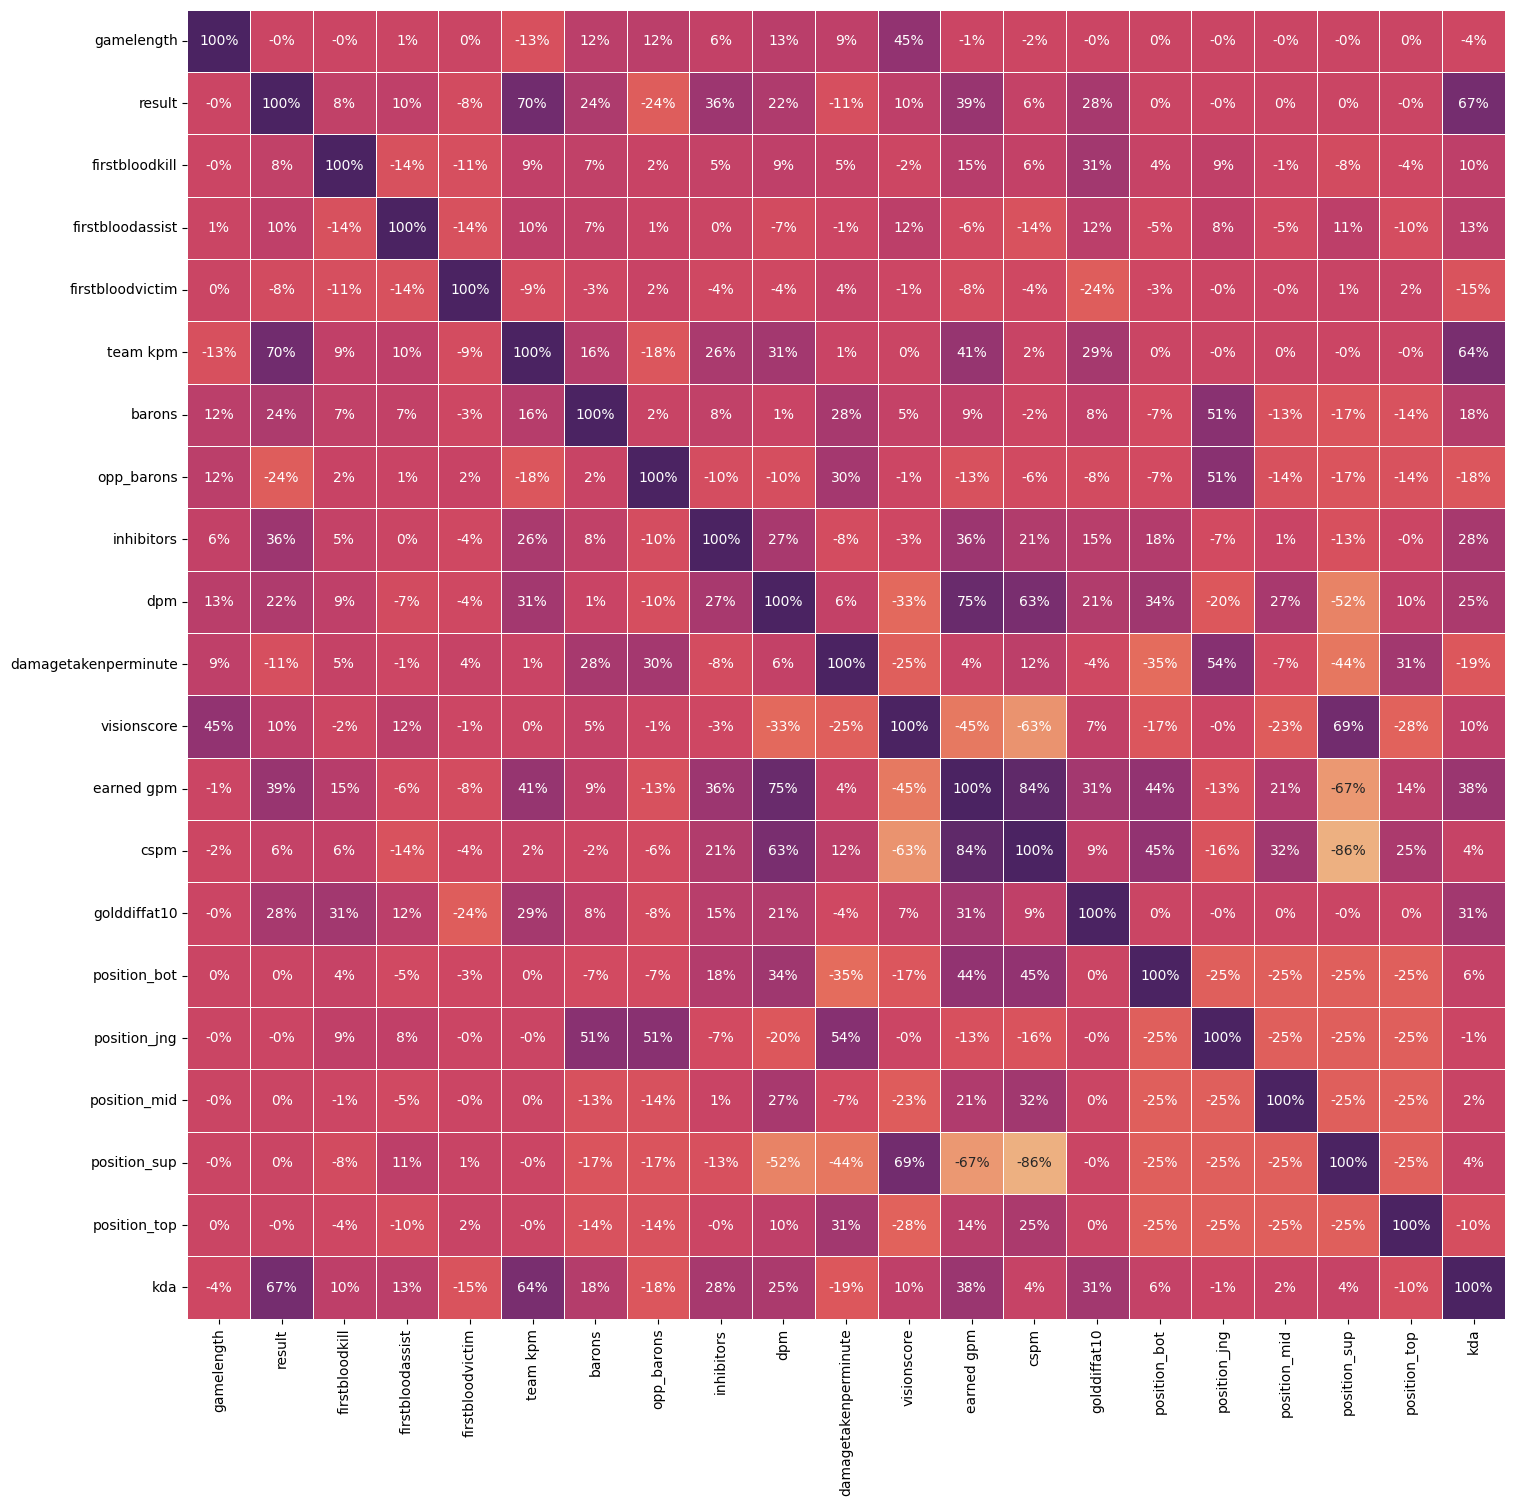

In [19]:
corrMatrix = df_p4.corr()
plt.figure(figsize=(17,17))
sn.heatmap(corrMatrix, linewidths=0.5, annot=True, cbar=False,
           cmap="flare", fmt="1.0%")
plt.show()

drop_cols=['earned gpm', 'position_sup', 'result']


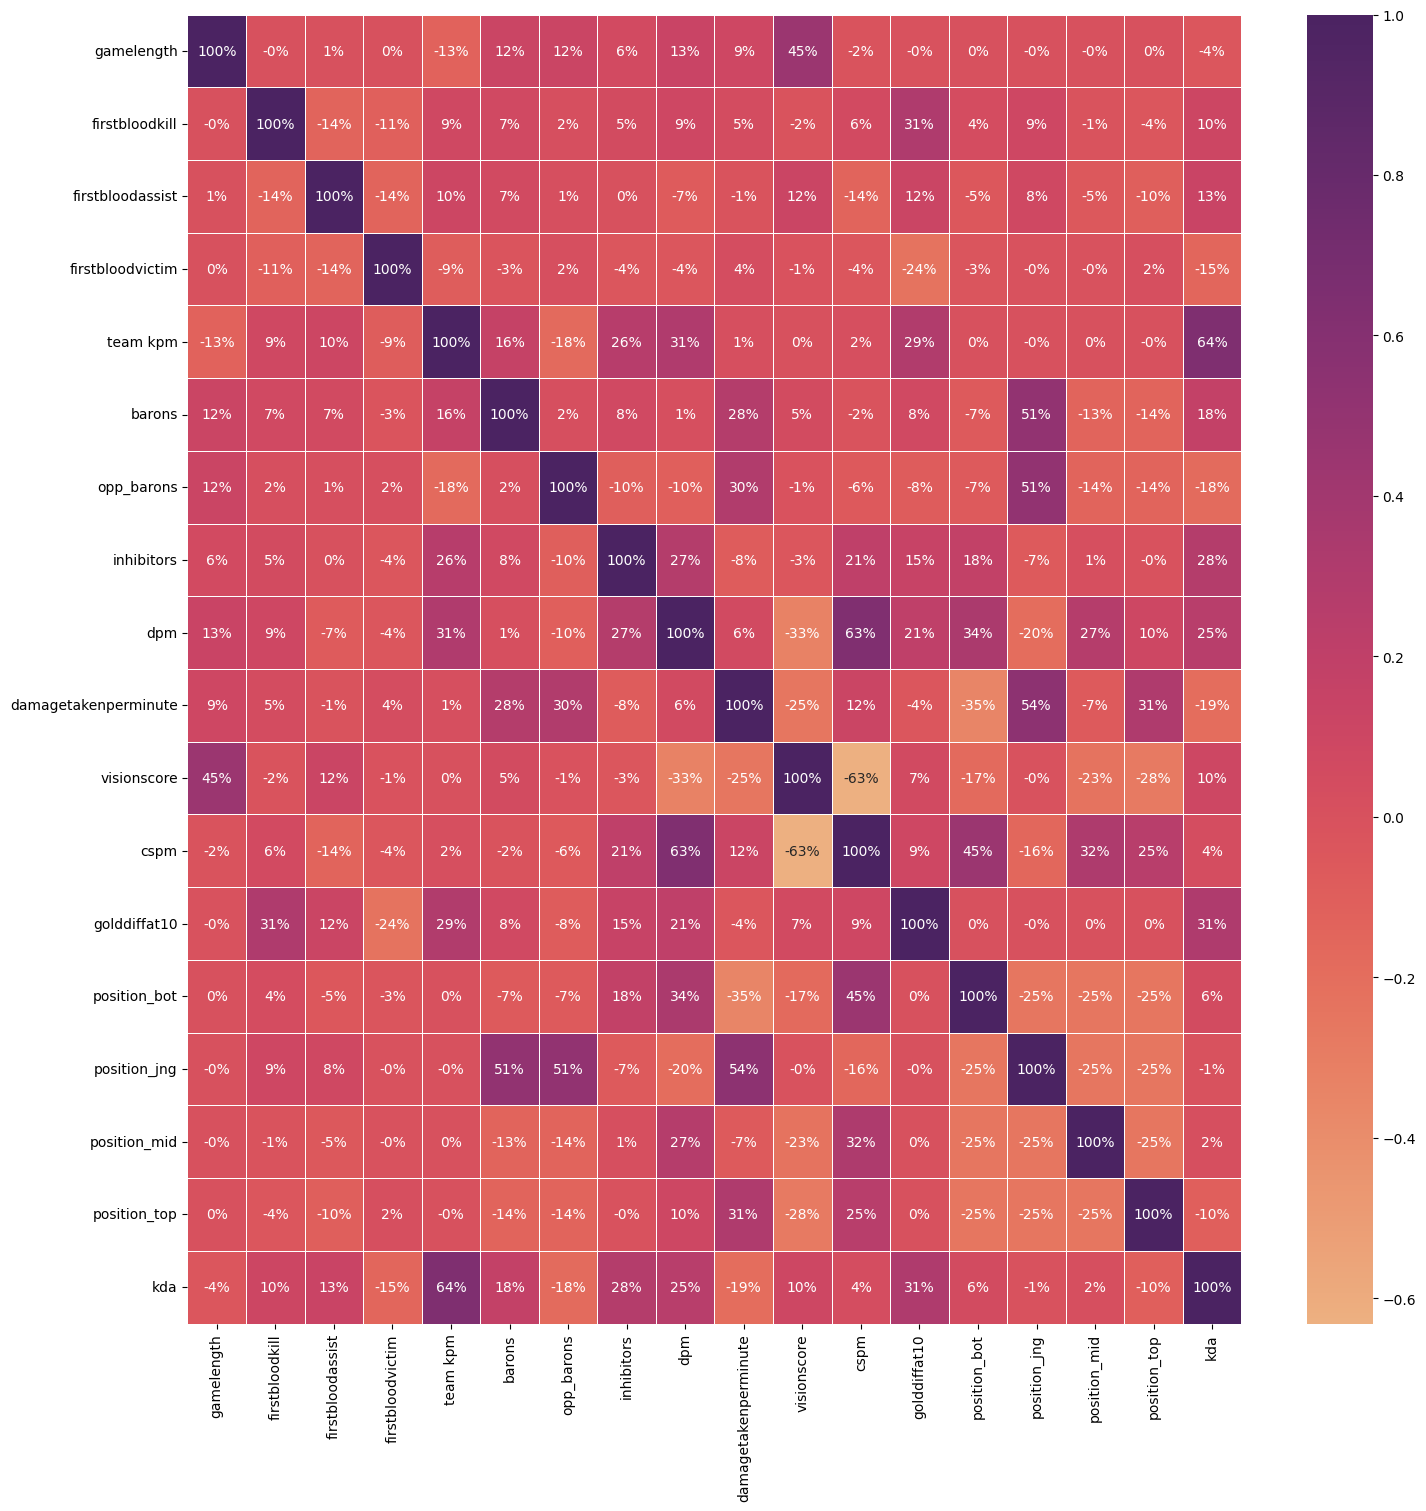

In [20]:
# programatic attempt at removing features that are highly correlated

# what correlation coefficient is too high for us?
max_val = 0.65

drop_cols = []
while True:
    # get a correlation matrix on the dataframe with dropped cols    
    correlation_matrix = df_p4.loc[:, ~df_p4.columns.isin(drop_cols)].corr() 
    # track total bad contributions for each col, starts at 0
    examined_pairs = {k:0 for k in correlation_matrix.columns}
    # loop through half the correlation matrix, looking for large values
    for i in range(correlation_matrix.shape[0]):
        for j in range(i + 1, correlation_matrix.shape[1]):
            val = abs(correlation_matrix.iloc[i, j])
            if val >= max_val:
                # large value found. mark how much each column contributes
                examined_pairs[correlation_matrix.columns[i]] += val
                examined_pairs[correlation_matrix.columns[j]] += val
    # did we find a column contributing too much?
    if max(examined_pairs.values()) == 0:
        # no! we're done
        break
    # yes! drop the worst offending column
    current_drop = sorted(examined_pairs.items(), reverse=True,
                          key=lambda item: item[1])[0][0]
    drop_cols.append(current_drop)
# what columns did we drop
print(f"drop_cols={drop_cols}")
# final correlation matrix
fig, ax = plt.subplots(figsize=(17, 17))
sn.heatmap(correlation_matrix, annot=True, linewidth=0.5, cmap="flare",
           fmt="1.0%")
plt.show()

In [21]:
X_D0, X_D1, Y_D0, Y_D1 = train_test_split(x, y,random_state = 42,test_size=0.2)

In [22]:
scaler = StandardScaler()

####  Elastic Net

Text(0, 0.5, 'weights')

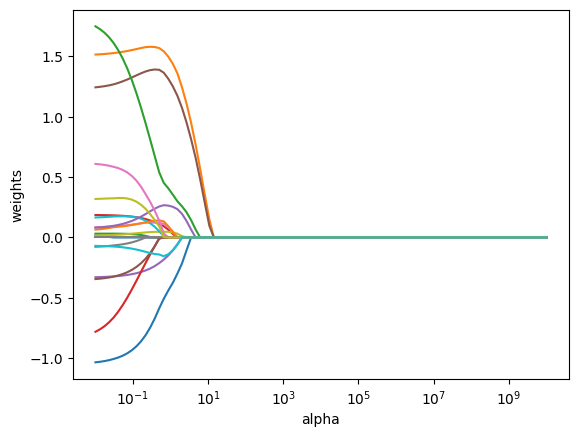

In [23]:
Elastic_Net = ElasticNet(max_iter = 10000)
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
for a in alphas:
    Elastic_Net.set_params(alpha=a)
    Elastic_Net.fit(scaler.fit_transform(x), y)
    coefs.append(Elastic_Net.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [24]:
Elastic_NetCV = ElasticNetCV(alphas = None, cv = 10 , max_iter = 100000)
Elastic_NetCV.fit(scaler.fit_transform(X_D0),Y_D0)
Elastic_NetCV.alpha_

0.006613574935661336

In [25]:
Elastic_Net.set_params(alpha=Elastic_NetCV.alpha_)
Elastic_Net.fit(scaler.fit_transform(X_D0), Y_D0)
print(pd.Series(Elastic_Net.coef_, index=x.columns))

gamelength              0.016363
result                  1.530820
firstbloodkill          0.033550
firstbloodassist        0.168931
firstbloodvictim       -0.324197
team kpm                1.253303
barons                  0.072567
opp_barons             -0.087912
inhibitors              0.008753
dpm                     0.160635
damagetakenperminute   -1.034454
visionscore             0.082562
earned gpm              1.688466
cspm                   -0.716054
golddiffat10            0.089676
position_bot           -0.342338
position_jng            0.616786
position_mid           -0.000000
position_sup            0.310935
position_top           -0.068102
dtype: float64


In [26]:
#MSE
print(mean_squared_error(Y_D1,
                         Elastic_Net.predict(scaler.fit_transform(X_D1))))

10.62266328957894


In [27]:
#RMSE
print(mean_squared_error(Y_D1,
                         Elastic_Net.predict(scaler.fit_transform(X_D1)),
                         squared=False))

3.2592427478754846


In [28]:
# R^2 value
print(Elastic_Net.score(scaler.fit_transform(X_D1),Y_D1))

0.5708105983578553


#### Lasso

Text(0, 0.5, 'weights')

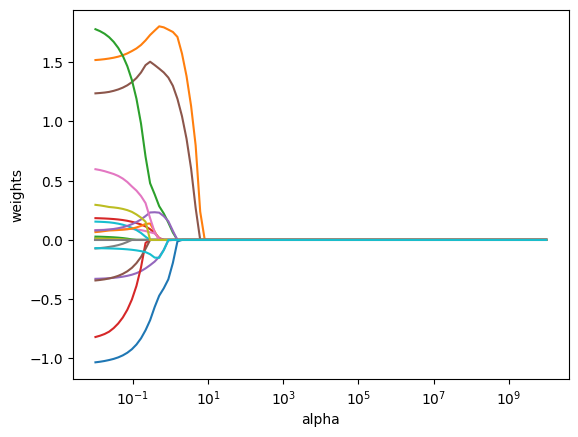

In [29]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scaler.fit_transform(x), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [30]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(scaler.fit_transform(X_D0), Y_D0)
lassocv.alpha_

0.003306787467830671

In [31]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scaler.fit_transform(X_D0), Y_D0)
print(pd.Series(lasso.coef_, index=x.columns))

gamelength              0.019969
result                  1.528595
firstbloodkill          0.031021
firstbloodassist        0.168186
firstbloodvictim       -0.325953
team kpm                1.240388
barons                  0.068835
opp_barons             -0.088543
inhibitors              0.003970
dpm                     0.149988
damagetakenperminute   -1.042921
visionscore             0.076096
earned gpm              1.755590
cspm                   -0.781936
golddiffat10            0.083239
position_bot           -0.347551
position_jng            0.616505
position_mid           -0.000000
position_sup            0.293839
position_top           -0.066003
dtype: float64


In [32]:
#MSE
print(mean_squared_error(Y_D1,
                         lasso.predict(scaler.fit_transform(X_D1))))

10.619558555806323


In [33]:
#RMSE
print(mean_squared_error(Y_D1,
                         lasso.predict(scaler.fit_transform(X_D1)),
                         squared=False))

3.2587664162695558


In [34]:
# R^2 value
print(lasso.score(scaler.fit_transform(X_D1),Y_D1))

0.5709360394825338


#### Final Model

In [35]:
fit_final = Lasso(max_iter = 10000)
lassocv_1 = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv_1.fit(scaler.fit_transform(x),y)
fit_final.set_params(alpha=lassocv_1.alpha_)
fit_final.fit(scaler.fit_transform(x), y)
print(pd.Series(fit_final.coef_, index=x.columns))

gamelength              0.016469
result                  1.514470
firstbloodkill          0.028964
firstbloodassist        0.184970
firstbloodvictim       -0.329507
team kpm                1.233766
barons                  0.082316
opp_barons             -0.075856
inhibitors              0.012062
dpm                     0.156015
damagetakenperminute   -1.037783
visionscore             0.062009
earned gpm              1.795120
cspm                   -0.830665
golddiffat10            0.077308
position_bot           -0.346279
position_jng            0.604199
position_mid           -0.000000
position_sup            0.300962
position_top           -0.068717
dtype: float64


In [36]:
#MSE
print(mean_squared_error(y, fit_final.predict(scaler.fit_transform(x))))

10.459454129738809


In [37]:
#RMSE
print(mean_squared_error(y,
                         fit_final.predict(scaler.fit_transform(x)),
                         squared=False))

3.2341079341510555


In [38]:
# R^2 value
print(fit_final.score(scaler.fit_transform(X_D0),Y_D0))

0.5719527887392473


#### Final Model, removed support players

In [39]:
df_no_sup = df_p4[df_p4['position_sup'] == 0]
df_no_sup = df_no_sup.drop(['position_sup'], axis=1)

df_no_sup = df_no_sup[df_no_sup['position_jng'] == 0]
df_no_sup = df_no_sup.drop(['position_jng'], axis=1)

y_n_s = df_no_sup['kda']
x_n_s = df_no_sup.drop(['kda'], axis=1)

In [40]:
fit_ns = Lasso(max_iter = 10000)
lassocv_2 = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv_2.fit(scaler.fit_transform(x_n_s),y_n_s)
fit_ns.set_params(alpha=lassocv_2.alpha_)
fit_ns.fit(scaler.fit_transform(x_n_s), y_n_s)
print(pd.Series(fit_ns.coef_, index=x_n_s.columns))

gamelength             -0.084609
result                  1.515701
firstbloodkill          0.042931
firstbloodassist        0.171845
firstbloodvictim       -0.320791
team kpm                1.173139
barons                  0.083743
opp_barons             -0.034667
inhibitors              0.016006
dpm                     0.256964
damagetakenperminute   -0.695696
visionscore             0.196611
earned gpm              1.136409
cspm                   -0.181922
golddiffat10            0.029694
position_bot           -0.221354
position_mid            0.131389
position_top           -0.000000
dtype: float64


In [41]:
#MSE
print("MSE",mean_squared_error(y_n_s,
                               fit_ns.predict(scaler.fit_transform(x_n_s))))
#RMSE
print("RMSE:",mean_squared_error(y_n_s,
                                 fit_ns.predict(scaler.fit_transform(x_n_s)),
                                 squared=False))

MSE 9.618834866112753
RMSE: 3.1014246510455084


In [42]:
# R^2 value
print(fit_ns.score(scaler.fit_transform(x_n_s),y_n_s))

0.5851780409431719


## Problem-3

 Feature importance plot to determine win or loss 


#### Data Processing

In [43]:
df_teams_rf = df_teams.copy()
df_teams_rf = df_teams_rf.drop(['gameid','league','playoffs','date',
                                'game','participantid','teamid',
                                'teamname','ban1','ban2','ban3',
                               'ban4','ban5'], axis=1)

dummies_side = pd.get_dummies(df_teams_rf['side'])
df_teams_rf = pd.concat((dummies_side,df_teams_rf), axis = 1)
Y_rf = df_teams_rf['result']
X_rf = df_teams_rf.drop(['result','side'],axis=1)

#### Random Forest

In [44]:
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_rf, Y_rf);

In [45]:
start_time = time.time()
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_],
             axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.069 seconds


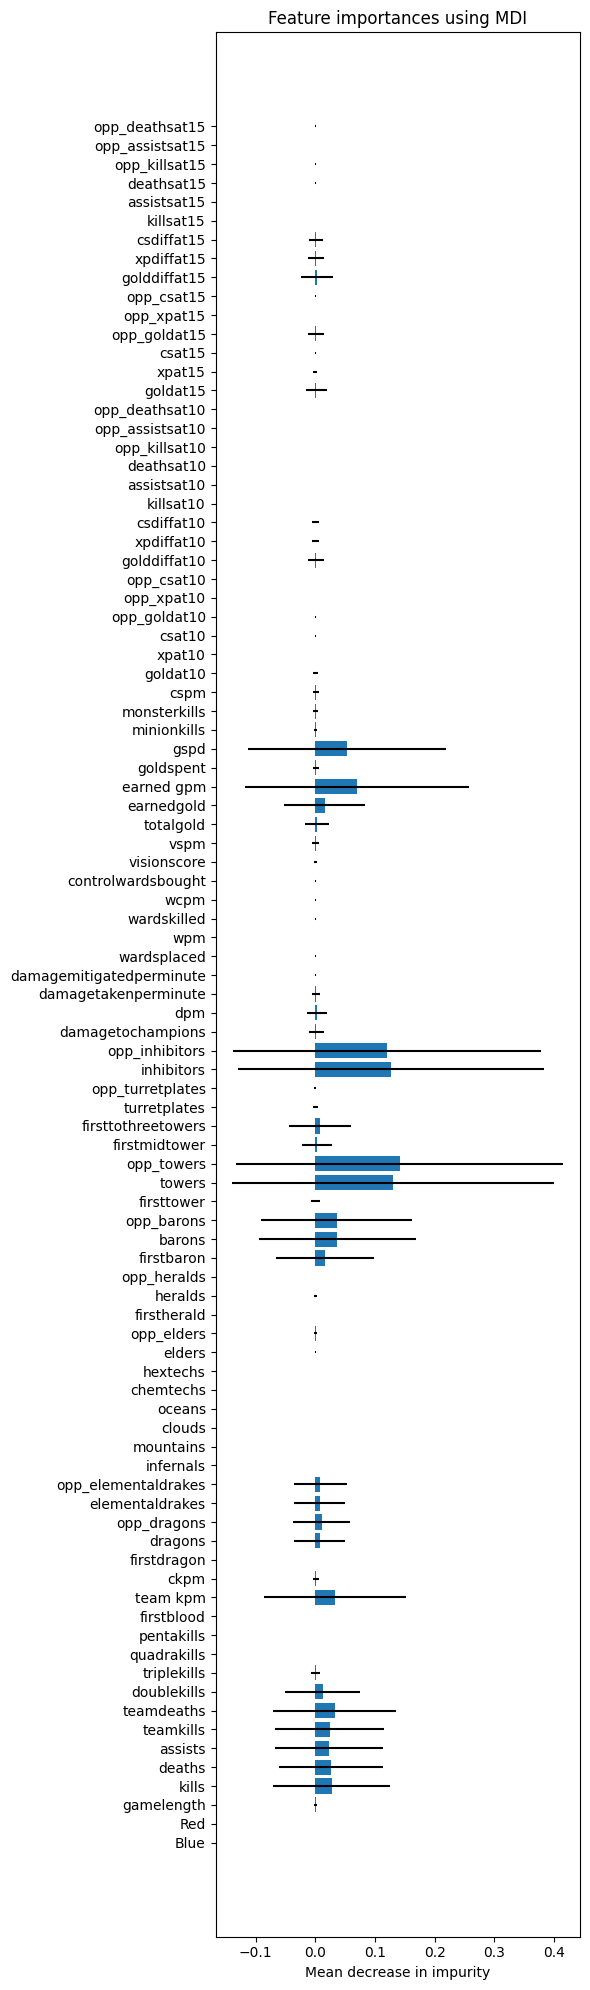

In [46]:
fig, ax = plt.subplots(figsize=(6, 20))

plt.barh(X_rf.columns, width=importances, xerr=std)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

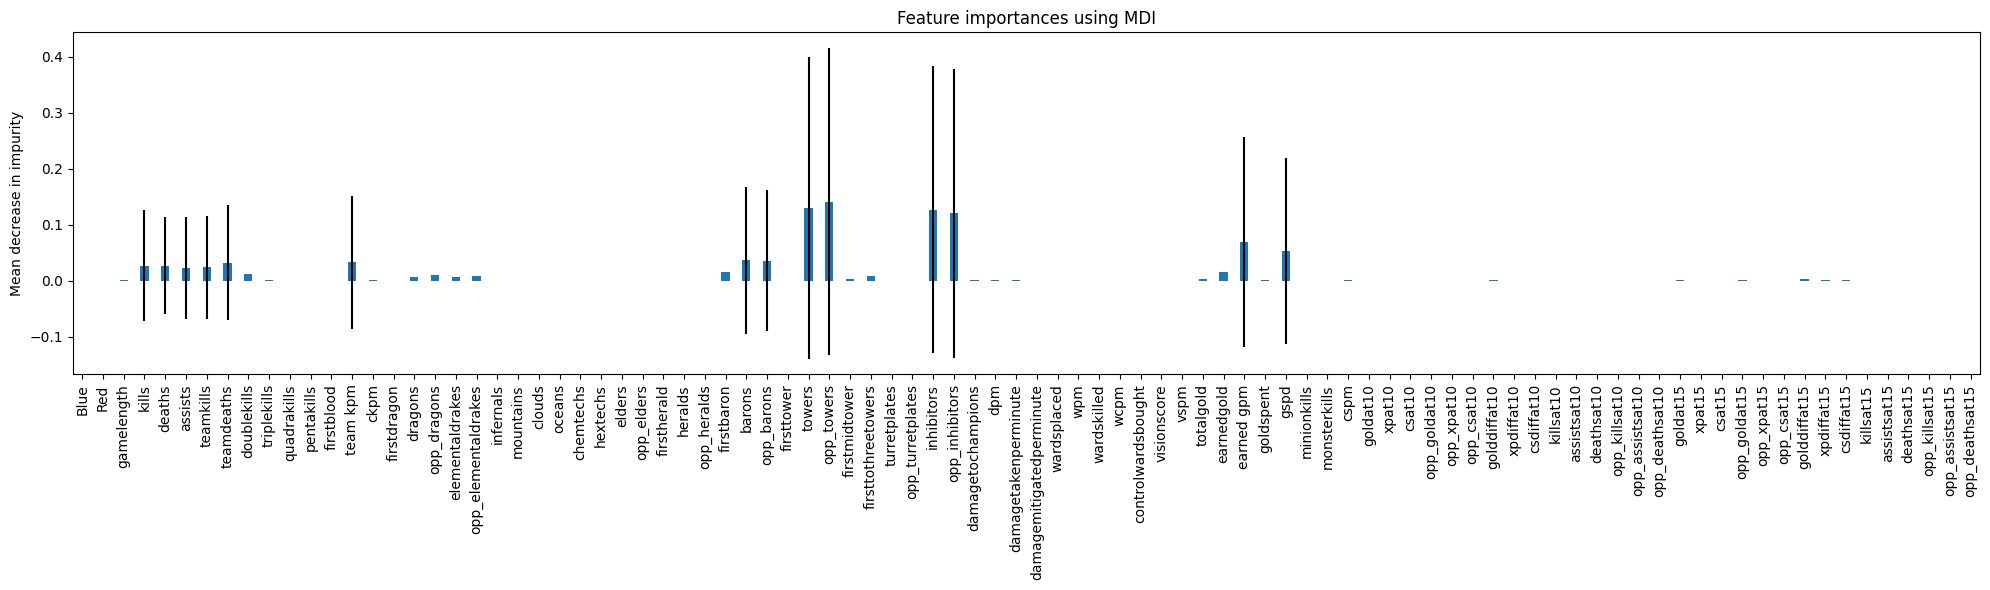

In [84]:
# same as above, but horizontal for presentation slides

horiz_forest_importances = pd.Series(importances, index=X_rf.columns)
df_horiz_forest_importances = pd.DataFrame(horiz_forest_importances)
df_horiz_forest_importances.plot.bar(yerr=std, width=0.4, figsize=(20, 6))

plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.legend().remove()
plt.tight_layout()

plt.show()

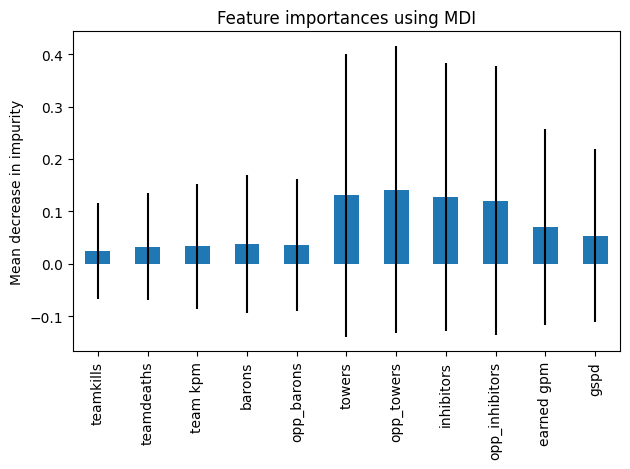

In [48]:
# filtering out low importance values

select_forest_importances = pd.Series(importances, index=X_rf.columns)
df_select_forest_importances = pd.DataFrame(select_forest_importances)
df_select_forest_importances["err"] = std
val_mask = df_select_forest_importances[0] >= 0.02
df_select_forest_importances = df_select_forest_importances[val_mask]
std = df_select_forest_importances["err"]
df_select_forest_importances.drop("err", inplace=True, axis=1)
df_select_forest_importances.drop(["kills", "deaths", "assists"], inplace=True,
                                  axis=0)

df_select_forest_importances.plot.bar(yerr=std)

plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.legend().remove()
plt.tight_layout()

plt.show()

Predicting win or loss using the features highlighted by the importance plot from the random
forest using various techniques {Logistic and ANN (Using only if SVM and logistic
regression do not produce satisfactory results)} {supervised learning task}

#### Data Processing

In [49]:
forest_importances = pd.Series(importances, index=X_rf.columns)
df_important_features = pd.DataFrame(forest_importances)
val_mask = df_important_features[0] >= 0.02
df_important_features = df_important_features[val_mask]
print(df_important_features.to_string())
nn_features = list(df_important_features.index)

                       0
kills           0.027315
deaths          0.026630
assists         0.022549
teamkills       0.024097
teamdeaths      0.032655
team kpm        0.033013
barons          0.037007
opp_barons      0.035895
towers          0.130332
opp_towers      0.141295
inhibitors      0.126710
opp_inhibitors  0.120384
earned gpm      0.069894
gspd            0.053140


In [50]:
data_logistic = df_teams[nn_features].copy()
data_logistic['results'] = df_teams.loc[:,['result']].copy()
data_logistic = data_logistic.rename(columns={'team kpm': 'team_kpm',
                                              'earned gpm': 'earned_gpm'})
Train, Test = train_test_split(data_logistic,random_state = 42,test_size=0.2)

#### Logistic Regression

In [51]:
formula = "results ~ " + " + ".join(Train.columns.drop('results'))
logreg_stats = smf.glm(formula = formula, data=data_logistic,
                       family=sm.families.Binomial()).fit()
logreg_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                results   No. Observations:                 9956
Model:                            GLM   Df Residuals:                     9943
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -174.67
Date:                Mon, 26 Jun 2023   Deviance:                       349.33
Time:                        13:35:14   Pearson chi2:                 1.01e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7411
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -20.3129      2.702     -7.517      0.000     -25.609     -15.016
kills              0.1984      0.049      4.015      0.000       0.102       0.295
deaths            -0.2063      0.018    -11.378      0.000      -0.242      -0.171
assists            0.0447      0.022      2.065      0.039       0.002       0.087
teamkills          0.1984      0.049      4.015      0.000       0.102       0.295
teamdeaths        -0.2063      0.018    -11.378      0.000      -0.242      -0.171
team_kpm         -11.1767      3.096     -3.610      0.000     -17.244      -5.109
barons            -0.2895      0.293     -0.987      0.323      -0.864       0.285
opp_barons        -0.2807      0.289     -0.973      0.331      -0.846       0.285
towers             1.2081      0.137      8.839      0.000       0.940       1.476
opp_towers        -1.6046      0.138    -11.654      0.000      -1.874      -1.335
inhibitors        -0.4790      0.173     -2.771      0.006      -0.818      -0.140
opp_inhibitors     0.5342      0.167      3.192      0.001       0.206       0.862
earned_gpm         0.0235      0.003      8.374      0.000       0.018       0.029
gspd             -40.2443      3.515    -11.448      0.000     -47.134     -33.354
==================================================================================
"""

#### TRAIN

In [52]:
logreg_stats_pred_prob = logreg_stats.predict(Train)
logreg_stats_pred_class_train = \
    [(0 if prob < 0.5 else 1) for prob in logreg_stats_pred_prob]

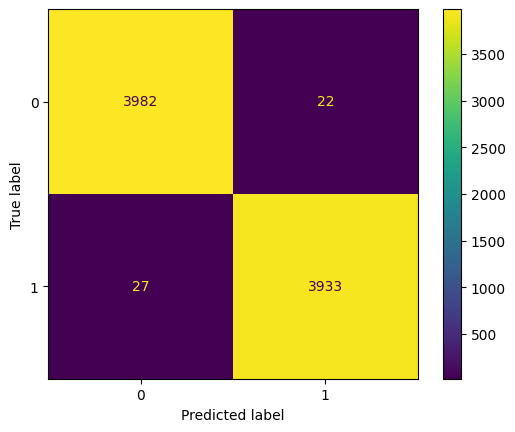

In [53]:
conf_mat_train = confusion_matrix(Train.results, logreg_stats_pred_class_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_mat_train)
disp_train.plot()
plt.show()

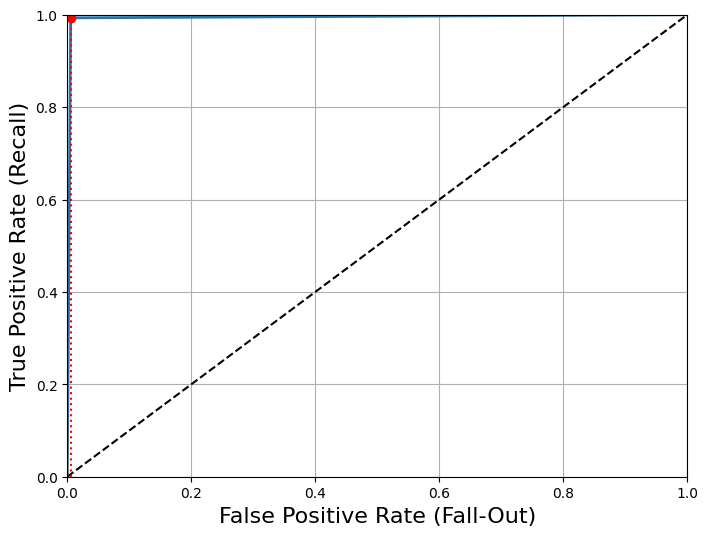

In [54]:
precisions_T, recalls_T, thresholds_T = \
    precision_recall_curve(Train.results, logreg_stats_pred_class_train)
fpr_T, tpr_T, thresholds_T = \
    roc_curve(Train.results, logreg_stats_pred_class_train)
# Plot the FPR against the TPR using Matplotlib
recall_90_precision_T = recalls_T[np.argmax(precisions_T >= 0.90)]

def plot_roc_curve(fpr_T, tpr_T, label=None):
    plt.plot(fpr_T, tpr_T, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr_T, tpr_T)
fpr_90_T = fpr_T[np.argmax(tpr_T >= recall_90_precision_T)]           
plt.plot([fpr_90_T, fpr_90_T], [0., recall_90_precision_T], "r:")   
plt.plot([0.0, fpr_90_T], [recall_90_precision_T, recall_90_precision_T], "r:")  
plt.plot([fpr_90_T], [recall_90_precision_T], "ro")                                               
plt.show()

In [55]:
roc_auc_score(Train.results, logreg_stats_pred_class_train)

0.9938436563436563

#### TEST

In [56]:
logreg_stats_pred_prob = logreg_stats.predict(Test)
logreg_stats_pred_class = [(0 if prob < 0.5 else 1) \
                           for prob in logreg_stats_pred_prob ]

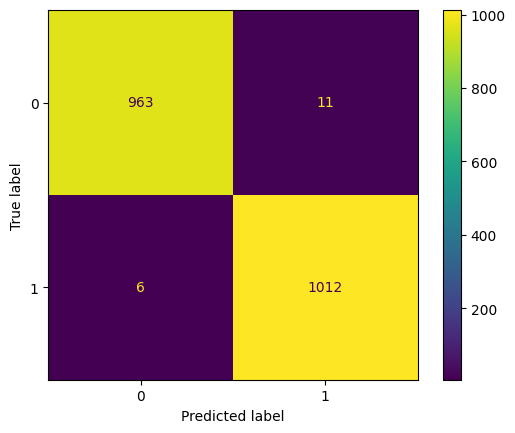

In [57]:
conf_mat = confusion_matrix(Test.results, logreg_stats_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [58]:
precisions, recalls, thresholds = \
    precision_recall_curve(Test.results, logreg_stats_pred_class)

In [59]:
fpr, tpr, thresholds = roc_curve(Test.results, logreg_stats_pred_class)

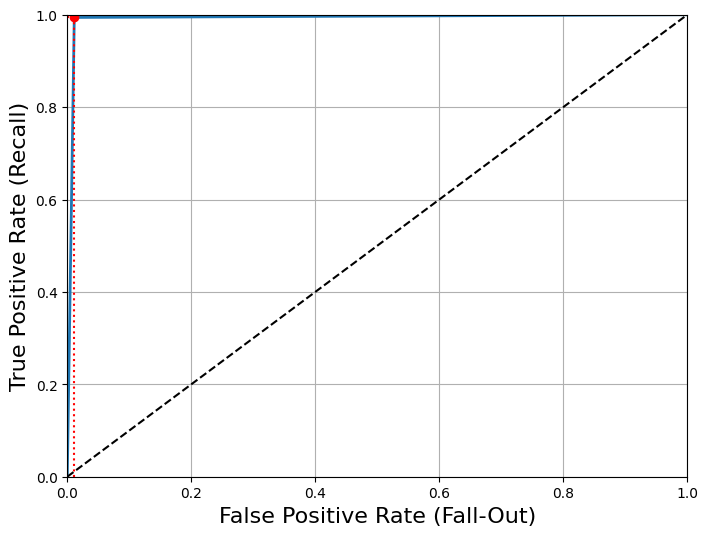

In [60]:
# Plot the FPR against the TPR using Matplotlib
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
plt.plot([fpr_90], [recall_90_precision], "ro")                                               
plt.show()

In [61]:
roc_auc_score(Test.results, logreg_stats_pred_class)

0.9914062279381806

#### Neural Network ( Failed Attempt: Too similar to logistic regression)

In [62]:
nural_features = nn_features.copy()
# split data into training and test sets
x_nn = df_teams[nural_features].copy()
y_nn = df_teams['result']

X_N0, X_N1, Y_N0, Y_N1 = train_test_split(x_nn, y_nn,shuffle=False,
                                          test_size=0.2)

In [63]:

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_N0, Y_N0, epochs=10,batch_size=2, verbose=1)

# Make predictions
predictions = model.predict(X_N1)
predicted_class =  [(0 if prob <= 0.5 else 1) for prob in predictions]

Epoch 1/10
3982/3982 [==============================] - 5s 1ms/step - loss: 0.1453 - accuracy: 0.9500
Epoch 2/10
3982/3982 [==============================] - 4s 991us/step - loss: 0.0834 - accuracy: 0.9706
Epoch 3/10
3982/3982 [==============================] - 4s 958us/step - loss: 0.0834 - accuracy: 0.9724
Epoch 4/10
3982/3982 [==============================] - 4s 955us/step - loss: 0.0818 - accuracy: 0.9714
Epoch 5/10
3982/3982 [==============================] - 4s 970us/step - loss: 0.0771 - accuracy: 0.9743
Epoch 6/10
3982/3982 [==============================] - 4s 965us/step - loss: 0.0741 - accuracy: 0.9749
Epoch 7/10
3982/3982 [==============================] - 4s 949us/step - loss: 0.0731 - accuracy: 0.9766
Epoch 8/10
3982/3982 [==============================] - 4s 1ms/step - loss: 0.0767 - accuracy: 0.9753
Epoch 9/10
3982/3982 [==============================] - 4s 1ms/step - loss: 0.0735 - accuracy: 0.9741
Epoch 10/10
63/63 [==============================] - 0s 1ms/step


In [64]:
prediction_train = model.predict(X_N0)
predicted_class_train =  [(0 if prob <= 0.5 else 1) for prob in prediction_train]

  1/249 [..............................] - ETA: 5s

249/249 [==============================] - 0s 1ms/step


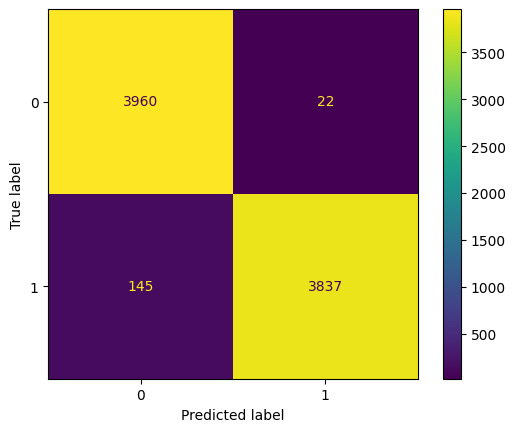

In [65]:
conf_mat_nn_train = confusion_matrix(Y_N0, predicted_class_train)
disp_nn_train = ConfusionMatrixDisplay(confusion_matrix=conf_mat_nn_train)
disp_nn_train.plot()
plt.show()

In [66]:
roc_auc_score(Y_N0, predicted_class_train)

0.9790306378704169

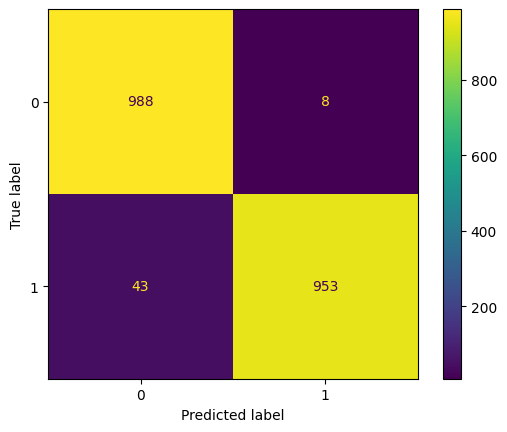

In [67]:
conf_mat_nn = confusion_matrix(Y_N1, predicted_class)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=conf_mat_nn)
disp_nn.plot()
plt.show()

In [68]:
roc_auc_score(Y_N1, predicted_class)

0.9743975903614458

#### Predictions

In [69]:
pred_features = nn_features.copy()
pred_features.append('teamname')

In [70]:
def get_average_vals(team):
    preds = df_teams[pred_features].copy()
    team_data = preds[preds['teamname'] == team]
    team_data = team_data.rename(columns={'team kpm': 'team_kpm',
                                          'earned gpm': 'earned_gpm'})
    team_data = team_data.drop(['teamname'],axis=1)
    
    team_data = team_data.reset_index(drop=True)
    
    team_data = pd.DataFrame(team_data.mean(axis=0))
    
    team_data = team_data.transpose()
    columns_to_round = ['barons', 'opp_barons', 'towers', 'opp_towers',
                        'inhibitors', 'opp_inhibitors']
    team_data[columns_to_round] = team_data[columns_to_round].round(0)
    return team_data

In [71]:
team_1 = get_average_vals('Gen.G')
team_2 = get_average_vals('T1')

In [72]:
pred_logi_1 = logreg_stats.predict(team_1)
pred_logi_2 = logreg_stats.predict(team_2)

In [73]:
print("Probabilty of win for Team 1:", pred_logi_1[0])
print("Probability of win for Team 2:", pred_logi_2[0])

Probabilty of win for Team 1: 0.9717535223444306
Probability of win for Team 2: 0.9981001104404654


###  Neural Network (Version 2)

#### Data processing

In [74]:
# team vs team predictions: data prep

# previous neural network tried making predictions on df_teams
# now try predicting matchups of team1 vs team2
# for that we need to change from this format
#  df_teams
#    red1
#    blue2
#    red3
#    blue4
# to this format
#  df_matches
#    red1 + blue2
#    red3 + blue4

df_team_red = df_teams[df_teams["side"] == "Red"]
df_team_red = df_team_red[[*nn_features, "teamid", "gameid", "result"]]
df_team_blue = df_teams[df_teams["side"] == "Blue"]
df_team_blue = df_team_blue[[*nn_features, "teamid", "gameid", "result"]]
df_team_matches = df_team_red.merge(right=df_team_blue, on="gameid",
                                    suffixes=("_red", "_blue"))

###
# This is commented out because it didn't change the predictions.
###
# the final predictions are off
# perhaps team1 is overrepresented or underrepresented in red or blue?
# make a change to df_matches to account for this
#  df_matches
#    red1 + blue2
#    blue2 + red1
#    red3 + blue4
#    blue4 + red2

# df_team_matches1 = df_team_red.merge(right=df_team_blue, on="gameid",
#                                      suffixes=("_red", "_blue"))
# df_team_matches2 = df_team_blue.merge(right=df_team_red, on="gameid",
#                                       suffixes=("_red", "_blue"))
# df_team_matches = pd.concat((df_team_matches1, df_team_matches2))

# we'll predict a matchup by joining two individual team records
# we'll create individual team records fby averaging all of their metrics
df_team_byteams = df_teams[[*nn_features, "teamid"]].groupby("teamid").mean()
# also tried median, but this had no difference on the predictions

# change features from "assists" to "assists_red" + "assists_blue"
# expected order is all reds first, then all blues
red_features = []
blue_features = []
for feature in nn_features:
    red_features.append(f"{feature}_red")
    blue_features.append(f"{feature}_blue")
matchup_features = [*red_features, *blue_features]

# team vs team predictions: model

# split data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(df_team_matches[matchup_features],
                     df_team_matches[["result_red", "result_blue"]],
                     test_size=0.2)

# standardize data
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#### Finding Best Param

In [75]:
mlp_gs = MLPClassifier(max_iter=1)
parameter_space = {
    'solver':['lbfgs','adam'],
    'hidden_layer_sizes': [(500,250),(300,150,50)],
    'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10],
}
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10,
                   scoring='accuracy')
clf.fit(X_train, y_train);

C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       478
           1       0.97      0.98      0.98       518

   micro avg       0.98      0.97      0.98       996
   macro avg       0.98      0.97      0.98       996
weighted avg       0.98      0.97      0.98       996
 samples avg       0.97      0.97      0.97       996



C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 1e-05, 'hidden_layer_sizes': (300, 150, 50), 'solver': 'adam'}


#### FIT

In [78]:
# fit the model
nn = MLPClassifier(solver=clf.best_params_['solver'],
                   activation='tanh', 
                   alpha=clf.best_params_['alpha'], 
                   hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'],
                   max_iter=100,
                   random_state=42)
nn.fit(X_train, y_train);

In [79]:
# team vs team predictions: test data

# make some predictions
predictions = nn.predict(X_test)

# combine predicted and actual results into a dataframe
df_eval1 = pd.DataFrame(predictions)
df_eval1.reset_index(drop=True, inplace=True)
df_eval2 = pd.DataFrame(y_test)
df_eval2.reset_index(drop=True, inplace=True)
df_eval = pd.concat([df_eval1, df_eval2], axis=1)
df_eval = df_eval.rename(columns={0: "prediction_red", 1: "prediction_blue"})


# how correct was the nn?
df_eval["correct_red"] = df_eval["prediction_red"] == df_eval["result_red"]
df_eval["correct_blue"] = df_eval["prediction_blue"] == df_eval["result_blue"]
df_eval["correct_2"] = df_eval["correct_blue"] & df_eval["correct_red"]
df_eval["correct_1"] = df_eval["correct_blue"] != df_eval["correct_red"]
df_eval["correct_0"] = (df_eval["correct_blue"] == False) & \
                       (df_eval["correct_red"] == False) 
correct2 = df_eval["correct_2"].sum()
correct1 = df_eval["correct_1"].sum()
correct0 = df_eval["correct_0"].sum()

print(f"neural network train score={nn.score(X_train, y_train)}")
print(f"neural network test score={nn.score(X_test, y_test)}")
print(f"both correct={correct2} "
      f"({round(correct2 / df_eval.shape[0] * 100, 4)}%)")
print(f"one correct={correct1} "
      f"({round(correct1 / df_eval.shape[0] * 100, 4)}%)")
print(f"neither correct={correct0} "
      f"({round(correct0 / df_eval.shape[0] * 100, 4)}%)")

neural network train score=0.9949773982923155
neural network test score=0.9929718875502008
both correct=989 (99.2972%)
one correct=0 (0.0%)
neither correct=7 (0.7028%)


In [80]:
# team vs team predictions: functions

def predict_match(df_team1: pd.DataFrame, df_team2: pd.DataFrame,
                  team1_name: str, team2_name: str, matchup: str,
                  actual_winner: str) -> bool:
    """
    Summary: Predicts the winner of a matchup given two specific teams.
    Parameters:
        df_team1: Contains metrics about team1.
        df_team2: Contains metrics about team1.
        team1_name: The display name of team 1.
        team2_name: The display name of team 1.
        matchup: The display name of the matchup.
        actual_winner: The name of the team that actually won this game.
                       None if unknown.
    Returns: True if the prediction was correct, false if it was not correct.
             None if there was no result to compare against.
    """

    # combine two teams into one dataframe that can be used for predictions
    df_match = df_team1.merge(right=df_team2, how="cross",
                              suffixes=("_red", "_blue"))
    
    # predict and format output
    match_predictions = nn.predict(df_match)
    df_match_eval = pd.DataFrame(match_predictions)
    df_match_eval = df_match_eval.rename(columns={0: team1_name,
                                                  1: team2_name})
    
    # check to see which team won. 4 possiblities for predictions
    winner = ""
    if df_match_eval.iloc[0, 0] == 1 and df_match_eval.iloc[0, 1] == 0:
        print(f"'{team1_name}' defeated '{team2_name}' in {matchup}", end="")
        winner = team1_name
    elif df_match_eval.iloc[0, 1] == 1 and df_match_eval.iloc[0, 0] == 0:
        print(f"'{team2_name}' defeated '{team1_name}' in {matchup}", end="")
        winner = team2_name
    elif df_match_eval.iloc[0, 1] == 0 and df_match_eval.iloc[0, 0] == 0:
        print(f"{matchup} error: both teams lost!", end="")
    else:
        print(f"{matchup} error: both teams won!", end="")

    # was this an actual match we're comparing against?
    if actual_winner is None:
        return None

    # was this prediction correct?
    if winner == actual_winner:
        print(" [Correct Prediction]")
        return True
    else:
        print(" [Wrong Prediction]")
        return False


def get_team_df(team_name: str) -> pd.DataFrame:
    """
    Summary: Gets a row from df_team_byteams that corresponds to team_name
    Parameters:
        team_name: The name of the team to retrieve data about.
    Returns: A dataframe that has the desired team info.
    """

    # get the teamid from teamname (needed for use in df_team_byteams)
    team_mask = df_teams["teamname"] == team_name
    df_team = df_teams[team_mask]
    team_id = df_team["teamid"].unique()[0]

    # get the desired row from df_team_byteams
    team_mask = df_team_byteams.index == team_id
    return df_team_byteams[team_mask]

In [81]:
# team vs team predictions: functions

# specific team dataframes
team_cloudnine = get_team_df("Cloud9")
team_counterlogicgaming = get_team_df("Counter Logic Gaming")
team_flyquest = get_team_df("FlyQuest")
team_100thieves = get_team_df("100 Thieves")
team_goldenguardians = get_team_df("Golden Guardians")
team_evilgeniuses = get_team_df("Evil Geniuses")

# predict some matchups
# https://lol.fandom.com/wiki/LCS/2023_Season/Spring_Playoffs
correctPredictions = 0
if predict_match(team_cloudnine, team_counterlogicgaming,
                 "Cloud9", "Counter Logic Gaming",
                 "Upper Bracket Semifinals 1", "Cloud9"):
    correctPredictions += 1
if predict_match(team_flyquest, team_100thieves,
              "FlyQuest", "100 Thieves", "Upper Bracket Semifinals 2",
              "FlyQuest"):
    correctPredictions += 1
if predict_match(team_100thieves, team_goldenguardians,
              "100 Thieves", "GoldenGuardians",
              "Lower Bracket Quarterfinals 1", "GoldenGuardians"):
    correctPredictions += 1
if predict_match(team_counterlogicgaming, team_evilgeniuses,
              "Counter Logic Gaming", "Evil Geniuses",
              "Lower Bracket Quarterfinals 2", "Evil Geniuses"):
    correctPredictions += 1
if predict_match(team_goldenguardians, team_evilgeniuses, 
              "GoldenGuardians", "Evil Geniuses", "Lower Bracket Semifinals",
              "GoldenGuardians"):
    correctPredictions += 1
if predict_match(team_cloudnine, team_flyquest, 
              "Cloud9", "FlyQuest", "Upper Bracket Finals", "Cloud9"):
    correctPredictions += 1
if predict_match(team_flyquest, team_goldenguardians, 
              "FlyQuest", "GoldenGuardians", "Lower Bracket Finals",
              "GoldenGuardians"):
    correctPredictions += 1
if predict_match(team_cloudnine, team_flyquest, 
              "Cloud9", "FlyQuest", "Grand Final", "Cloud9"):
    correctPredictions += 1
print(f"\nCorrect Predictions: {correctPredictions} "
      f"({round(correctPredictions / 8 * 100, 2)}%)")

'Cloud9' defeated 'Counter Logic Gaming' in Upper Bracket Semifinals 1 [Correct Prediction]
'100 Thieves' defeated 'FlyQuest' in Upper Bracket Semifinals 2 [Wrong Prediction]
'GoldenGuardians' defeated '100 Thieves' in Lower Bracket Quarterfinals 1 [Correct Prediction]
'Evil Geniuses' defeated 'Counter Logic Gaming' in Lower Bracket Quarterfinals 2 [Correct Prediction]
'Evil Geniuses' defeated 'GoldenGuardians' in Lower Bracket Semifinals [Wrong Prediction]
'FlyQuest' defeated 'Cloud9' in Upper Bracket Finals [Wrong Prediction]
'GoldenGuardians' defeated 'FlyQuest' in Lower Bracket Finals [Correct Prediction]
'FlyQuest' defeated 'Cloud9' in Grand Final [Wrong Prediction]

Correct Predictions: 4 (50.0%)


C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier wa

In [82]:
# team vs team predictions: comparison to other attempt

team_geng = get_team_df("Gen.G")
team_t1 = get_team_df("T1")
b = predict_match(team_geng, team_t1, "Gen.G", "T1", "test", None)

'T1' defeated 'Gen.G' in test

C:\Users\Great\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
